# Housing Prediction - Advanced Regression Assignment - Rucha Tare

## Step1: Data Sourcing 

### Importing Libraries to python , mapping Gdrive , Importing datasets

In [ ]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')
#Importing needed libraries to python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score


### 1.1 Set PD options 

As a practice , it is good to set PD options

In [ ]:
pd.options.mode.chained_assignment = None
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### 1.2: Import CSV file

Mounting the drive, as data set is loaded on the drive

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing CSV file 

In [ ]:
train = pd.read_csv("/content/drive/My Drive/train.csv", engine='python', encoding='utf-8')

Checking the imported data


In [ ]:
train.shape

(1460, 81)

**The original dataset has 81 columns** 

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1379.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.500,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,46.549,567.240,1057.429,1162.627,346.992,5.845,1515.464,0.425,0.058,1.565,0.383,2.866,1.047,6.518,0.613,1978.506,1.767,472.980,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.610,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,161.319,441.867,438.705,386.588,436.528,48.623,525.480,0.519,0.239,0.551,0.503,0.816,0.220,1.625,0.645,24.690,0.747,213.805,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.000,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,1900.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.750,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,0.000,223.000,795.750,882.000,0.000,0.000,1129.500,0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,1961.000,1.000,334.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.500,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,0.000,477.500,991.500,1087.000,0.000,0.000,1464.000,0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,1980.000,2.000,480.000,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.250,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,0.000,808.000,1298.250,1391.250,728.000,0.000,1776.750,1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,2002.000,2.000,576.000,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.000,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,1474.000,2336.000,6110.000,4692.000,2065.000,572.000,5642.000,3.000,2.000,3.000,2.000,8.000,3.000,14.000,3.000,2010.000,4.000,1418.000,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


Checking the data types

In [ ]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


## Step2: Data Cleaning

###2.1 : Firstly , Dropping the columns that are irrelevant to us

Checking Columns

In [ ]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

We will drop below columns :
1. ID - Not useful in the analysis
2. MiscVal - As we dropped misc features already this column is now irrelevant
3. MoSold , saletype , sale condition - these are columns that we will encounter only when a sales or purchase is done , hence makes sense to drop it 

In [ ]:
train.drop(['MoSold' , 'SaleType', 'Id', 'SaleCondition'],axis='columns', inplace=True)

In [ ]:
train.shape

(1460, 77)

** We have 77 columns**

### 2.2: Fixing Null values 

Checking for null values in the columns

In [ ]:
(train.isna() == True).sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageQual         81
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
BsmtExposure       38
BsmtFinType2       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
ExterQual           0
ExterCond           0
YearBuilt           0
Foundation          0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearRemodAdd        0
SalePrice           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
Neighborhood        0
LandSlope           0
LotConfig           0
Utilities           0
LandContour         0
LotShape            0
Street              0
LotArea             0
MSZoning            0
Condition1          0
Heating             0
BsmtFinSF1

Checking the % of null values in each columns

In [ ]:
round(train.isnull().sum()/len(train.index),2).sort_values(ascending=False)

PoolQC          1.000
MiscFeature     0.960
Alley           0.940
Fence           0.810
FireplaceQu     0.470
LotFrontage     0.180
GarageCond      0.060
GarageQual      0.060
GarageType      0.060
GarageYrBlt     0.060
GarageFinish    0.060
BsmtFinType1    0.030
BsmtFinType2    0.030
BsmtQual        0.030
BsmtCond        0.030
BsmtExposure    0.030
MasVnrArea      0.010
MasVnrType      0.010
YearBuilt       0.000
ExterQual       0.000
ExterCond       0.000
Foundation      0.000
Exterior2nd     0.000
Exterior1st     0.000
RoofMatl        0.000
RoofStyle       0.000
YearRemodAdd    0.000
SalePrice       0.000
OverallCond     0.000
OverallQual     0.000
HouseStyle      0.000
BldgType        0.000
Condition2      0.000
Condition1      0.000
LandSlope       0.000
LotConfig       0.000
Utilities       0.000
LandContour     0.000
LotShape        0.000
Street          0.000
LotArea         0.000
MSZoning        0.000
Neighborhood    0.000
Heating         0.000
BsmtFinSF1      0.000
KitchenAbv

Dropping the columns that have more than 10% of null values 

In [ ]:
round(train.isnull().sum()/len(train.index),2)[round(train.isnull().sum()/len(train.index),2).values>0.10]

LotFrontage   0.180
Alley         0.940
FireplaceQu   0.470
PoolQC        1.000
Fence         0.810
MiscFeature   0.960
dtype: float64

Dropping the columns:
1. LotFrontage
2. Alley
3. FireplaceQu
4. Fence
5. MiscFeature

In [ ]:
train.drop(['LotFrontage' , 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],axis='columns',inplace=True)

Checking the shape of the data and nulls again 

In [ ]:
train.shape

(1460, 71)

***Now we have 71 columns ***

#### Creating new variables using the year varaibles to find the age of the house/property w.r.t current year

In [ ]:
train['YearBuiltold'] = pd.datetime.now().year - train['YearBuilt']
train['YearRemodAddold'] = pd.datetime.now().year - train['YearRemodAdd']
train['GarageYrBltold'] = pd.datetime.now().year - train['GarageYrBlt']
train['YrSoldold'] = pd.datetime.now().year - train['YrSold']

Deriving 
1. YearBuiltold from YearBuilt
2. YearRemodAddold from YearRemodAdd
3. GarageYrBltold from GarageYrBlt
4. YrSoldold from YrSold


Now, We will drop the actual year columns

In [ ]:
train.drop(['YearBuilt' , 'YearRemodAdd', 'GarageYrBlt', 'YrSold'],axis='columns', inplace=True)

for houses that do not have garages the Garage year built old will be -1 

In [ ]:
train.GarageYrBltold.fillna(-1,inplace=True)

Checking nulls again after imputing GarageYrBltold

In [ ]:
round(train.isnull().sum()/len(train.index),2).sort_values(ascending=False)

GarageType        0.060
GarageQual        0.060
GarageFinish      0.060
GarageCond        0.060
BsmtFinType2      0.030
BsmtFinType1      0.030
BsmtExposure      0.030
BsmtCond          0.030
BsmtQual          0.030
MasVnrArea        0.010
MasVnrType        0.010
RoofMatl          0.000
Exterior1st       0.000
Exterior2nd       0.000
ExterQual         0.000
OverallCond       0.000
ExterCond         0.000
Foundation        0.000
BsmtFinSF1        0.000
RoofStyle         0.000
YrSoldold         0.000
OverallQual       0.000
BsmtUnfSF         0.000
HouseStyle        0.000
BldgType          0.000
Condition2        0.000
Condition1        0.000
Neighborhood      0.000
LandSlope         0.000
LotConfig         0.000
Utilities         0.000
LandContour       0.000
LotShape          0.000
Street            0.000
LotArea           0.000
MSZoning          0.000
BsmtFinSF2        0.000
HeatingQC         0.000
TotalBsmtSF       0.000
Functional        0.000
YearRemodAddold   0.000
YearBuiltold    

Plotting heatmap to check the rest of the missing values

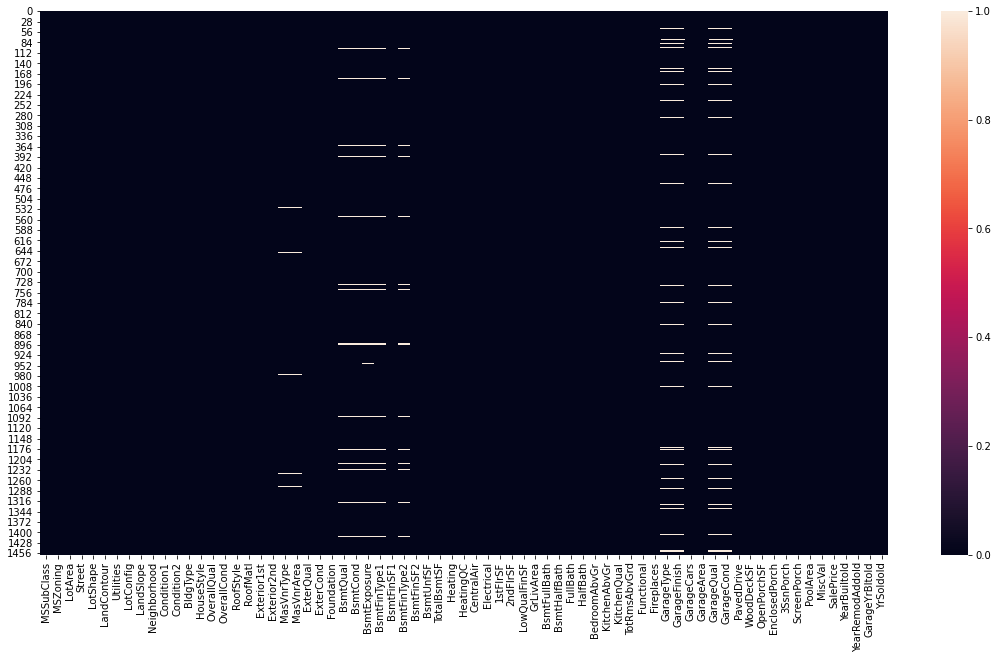

In [ ]:
plt.figure(figsize=(19,10))
sns.heatmap(data=train.isnull())

In [ ]:
train.shape

(1460, 71)

### 2.3 : Seggregate the obj and numeric columns based on data type

Let's see how the categorical data looks like 

In [ ]:
train[list(train.dtypes[train.dtypes=='object'].index)].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y


Going through the data dictionary we see that the below columns are ordinal in nature 
1. LandSlope
2. ExterQual
3. BasmtQual
4. BsmtCond
5. BsmtExposure
6. BsmtFinType1
7. BsmtFinType2
8. HeatingQC
9. CentralAir
10. KitchenQual
11. GarageFinish
12. GarageQual
13. GarageCond
14. ExterCond
15. LotShape

In [ ]:
train[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head(20)

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
5,Gtl,TA,Gd,TA,No,GLQ,Unf,Ex,Y,TA,Unf,TA,TA,TA,IR1
6,Gtl,Gd,Ex,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
7,Gtl,TA,Gd,TA,Mn,ALQ,BLQ,Ex,Y,TA,RFn,TA,TA,TA,IR1
8,Gtl,TA,TA,TA,No,Unf,Unf,Gd,Y,TA,Unf,Fa,TA,TA,Reg
9,Gtl,TA,TA,TA,No,GLQ,Unf,Ex,Y,TA,RFn,Gd,TA,TA,Reg


We will replace these ordinal features to numeric

Note : for Nobasement and nogarage conditions , we replaced NA with -1 

In [ ]:
train['LandSlope'] = train.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
train['ExterQual'] = train.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
train['BsmtQual'] = train.BsmtQual.map({'NA':-1,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train['BsmtCond'] = train.BsmtCond.map({'NA':-1,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train['BsmtExposure'] = train.BsmtExposure.map({'NA':-1,'No':1,'Mn':2,'Av':3,'Gd':4})
train['BsmtFinType1'] = train.BsmtFinType1.map({'NA':-1,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
train['BsmtFinType2'] = train.BsmtFinType2.map({'NA':-1,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
train['HeatingQC'] = train.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
train['CentralAir'] = train.CentralAir.map({'N':0,'Y':1})
train['KitchenQual'] = train.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
train['GarageFinish'] = train.GarageFinish.map({'NA':-1,'Unf':1,'RFn':2,'Fin':3})
train['GarageQual'] = train.GarageQual.map({'NA':-1,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train['GarageCond'] = train.GarageCond.map({'NA':-1,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train['ExterCond'] = train.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
train['LotShape'] = train.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

Let us check how these variables look now 

In [ ]:
train[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head(20)

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4.000,3.000,1.000,6.000,1.000,4,1,3,2.000,3.000,3.000,2,3
1,0,2,4.000,3.000,4.000,5.000,1.000,4,1,2,2.000,3.000,3.000,2,3
2,0,3,4.000,3.000,2.000,6.000,1.000,4,1,3,2.000,3.000,3.000,2,0
3,0,2,3.000,4.000,1.000,5.000,1.000,3,1,3,1.000,3.000,3.000,2,0
4,0,3,4.000,3.000,3.000,6.000,1.000,4,1,3,2.000,3.000,3.000,2,0
5,0,2,4.000,3.000,1.000,6.000,1.000,4,1,2,1.000,3.000,3.000,2,0
6,0,3,5.000,3.000,3.000,6.000,1.000,4,1,3,2.000,3.000,3.000,2,3
7,0,2,4.000,3.000,2.000,5.000,4.000,4,1,2,2.000,3.000,3.000,2,0
8,0,2,3.000,3.000,1.000,1.000,1.000,3,1,2,1.000,2.000,3.000,2,3
9,0,2,3.000,3.000,1.000,6.000,1.000,4,1,2,2.000,4.000,3.000,2,3


In [ ]:
train_obj_col = list(train.select_dtypes(include='object').columns)
train_obj_col

['MSZoning',
 'Street',
 'LandContour',
 'Utilities',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'Electrical',
 'Functional',
 'GarageType',
 'PavedDrive']

In [ ]:
train[list(train.dtypes[train.dtypes=='object'].index)].head()

,MSZoning,Street,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,Functional,GarageType,PavedDrive
0,RL,Pave,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y
1,RL,Pave,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,SBrkr,Typ,Attchd,Y
2,RL,Pave,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y
3,RL,Pave,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,SBrkr,Typ,Detchd,Y
4,RL,Pave,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y


In [ ]:
train_num_col = list(train.select_dtypes(exclude='object').columns)
train_num_col

['MSSubClass',
 'LotArea',
 'LotShape',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice',
 'YearBuiltold',
 'YearRemodAddold',
 'GarageYrBltold',
 'YrSoldold']

### 2.4 : Imputing missing values 

For all the columns that have null values we will impute it with mean (numercial variable) or mode(categorical variable)

We will create a function to impute the missing values 

In [ ]:
def fillna_col(df):
  for col in train_obj_col:
    df[col].fillna(value=df[col].mode()[0],inplace=True)
  for col in train_num_col:
    df[col].fillna(value=df[col].mean(),inplace=True)

In [ ]:
fillna_col(train)

In [ ]:
train.isnull().sum()

MSSubClass         0
MSZoning           0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr 

Plotting heat map again to check the missing values 

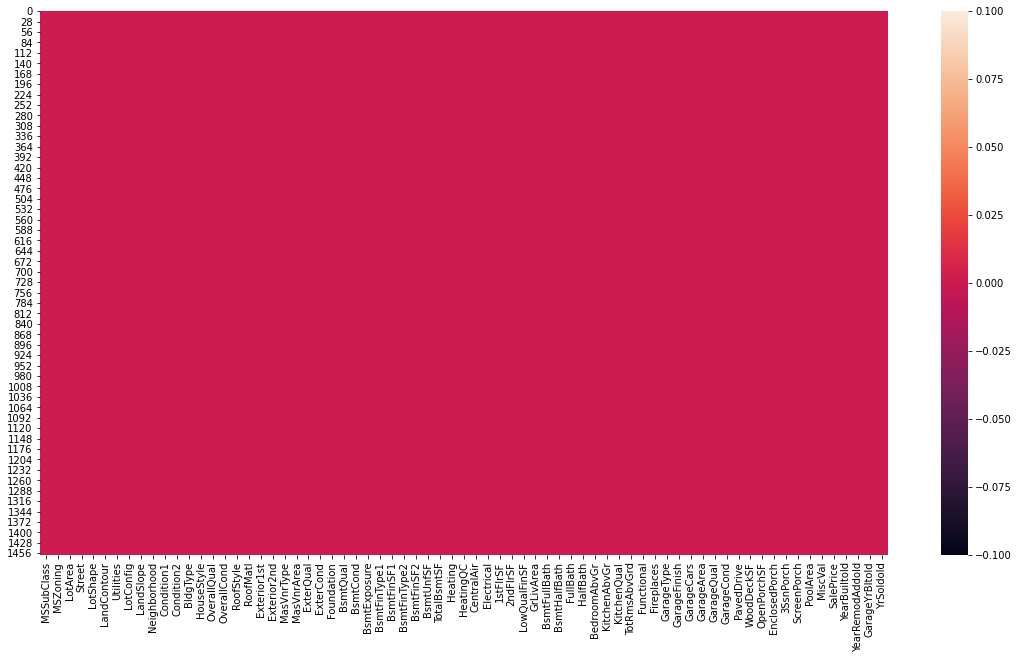

In [ ]:
plt.figure(figsize=(19,10))
sns.heatmap(data=train.isnull())

We have taken care of all the missing values , So we can move ahead

### 2.5 : Checking for redundant data/ Non Unique columns 

In [ ]:
unique_col = train.nunique()
unique_col = unique_col[unique_col.values == 1]
print(unique_col)

Series([], dtype: int64)


There are no such non unique columns 

### 2.6 : Checking for duplicates rows in the data

In [ ]:
train.drop_duplicates(subset=None,inplace=True)

In [ ]:
train.shape

(1460, 71)

There are no duplicate rows in the data

##Step 3 - Exploratory Data Analysis

### Step 3.1 Univariate - Target Variable analysis 

In [ ]:
train['SalePrice'].describe()

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64

SalesPrice is our target variable , We will check the variable tendencies and dsitribution for any skweness

Text(0.5, 1.0, 'Original')

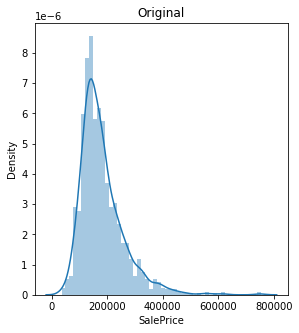

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(train.SalePrice, bins=50)
plt.title('Original')


This distribution looks Skewed , we will check the skewness and kurtosis of the data 

In [ ]:
train.SalePrice.skew()

1.8828757597682129

In [ ]:
train.SalePrice.kurt()

6.536281860064529

To make the target Variable normally distributed we will use log transform to cap this 

In [ ]:
train['SalePrice'] = np.log(train['SalePrice'])

Text(0.5, 1.0, 'Transformed')

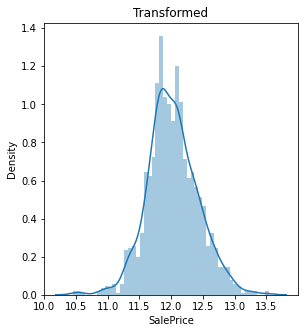

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(train.SalePrice, bins=50)
plt.title('Transformed')

Now this distribution of the target variable Sale Price looks normally distributed

### Step 3.2 Bivariate Multivariate - Data Visualization

#### 3.2.1 : Checking the correlation using heatmap

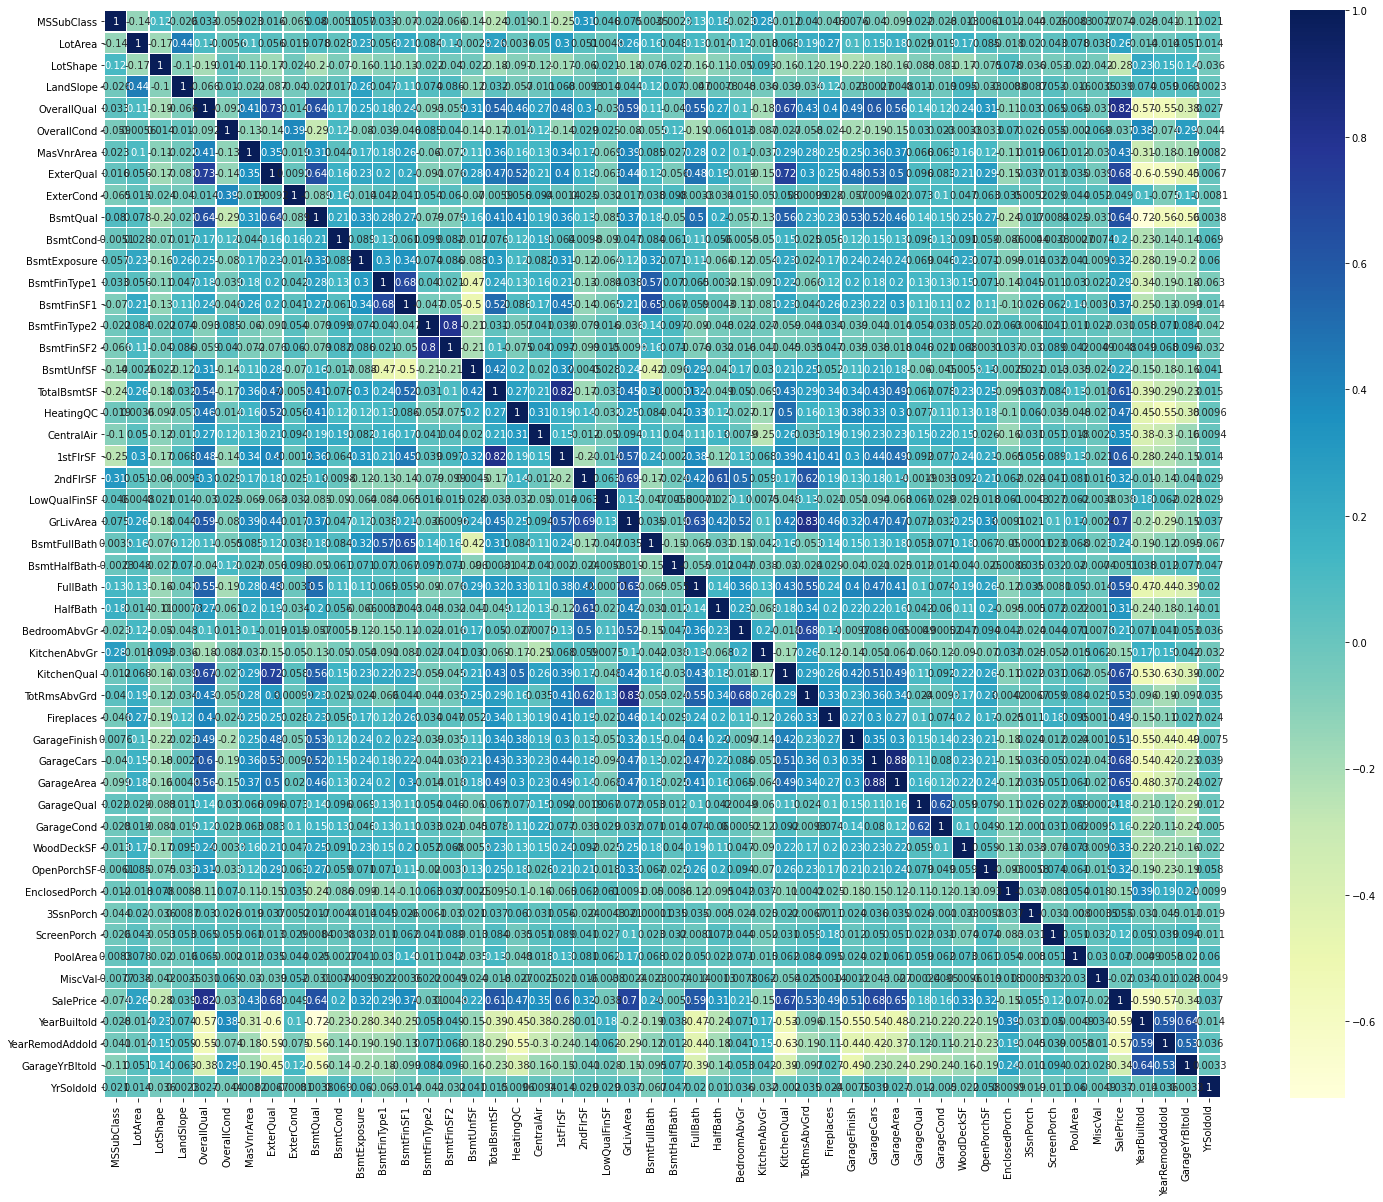

In [ ]:
sp

Correlation heat map of only such features that are highly corelated (corr >= 0.5) with the target variable 'Sales Price' 

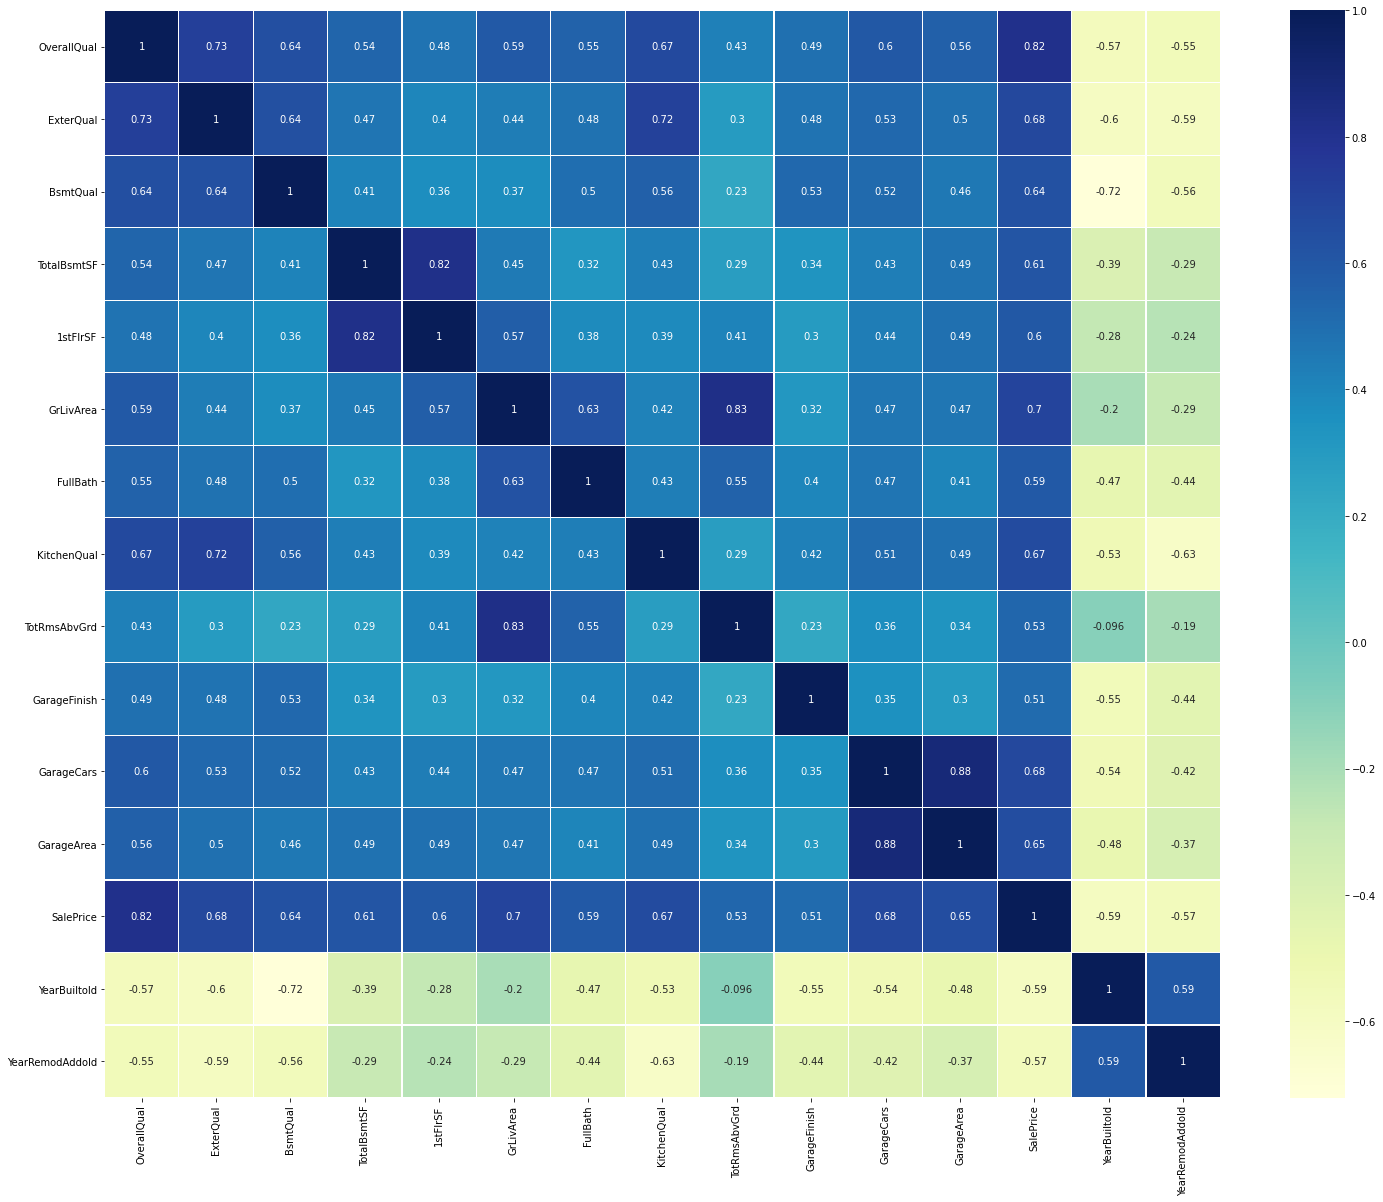

In [ ]:
high_corr = train.corr()
high_corr_features = high_corr.index[abs(high_corr['SalePrice']) >= 0.5]
high_corr_features
plt.figure(figsize = (25,20))
sns.heatmap(train[high_corr_features].corr(), annot = True,cmap='YlGnBu', linewidths=0.3)
plt.show()

In [ ]:
print(high_corr_features)

Index(['OverallQual', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'GarageFinish',
       'GarageCars', 'GarageArea', 'SalePrice', 'YearBuiltold',
       'YearRemodAddold'],
      dtype='object')


Above features will be deciding factors in prediction of the SalePrice:
1. OverallQual
2. TotalBsmtSF
3. 1stFlrSF
4. GrLivArea
5. FullBath
6. TotRmsAbvGrd
7. GarageCars
8. GarageArea
9. SalePrice
10. YearBuiltold
11. YearRemodAddold
12. GarageYrBltold


#### 3.2.2 Plotting a Bar Plot with highly correlated features 

Creating a function for plot 

In [ ]:
def plotbar(x_col_name):
    plt.figure(figsize = (50,30))
    sns.barplot(x=x_col_name, y='SalePrice', data=train)
    plt.show()

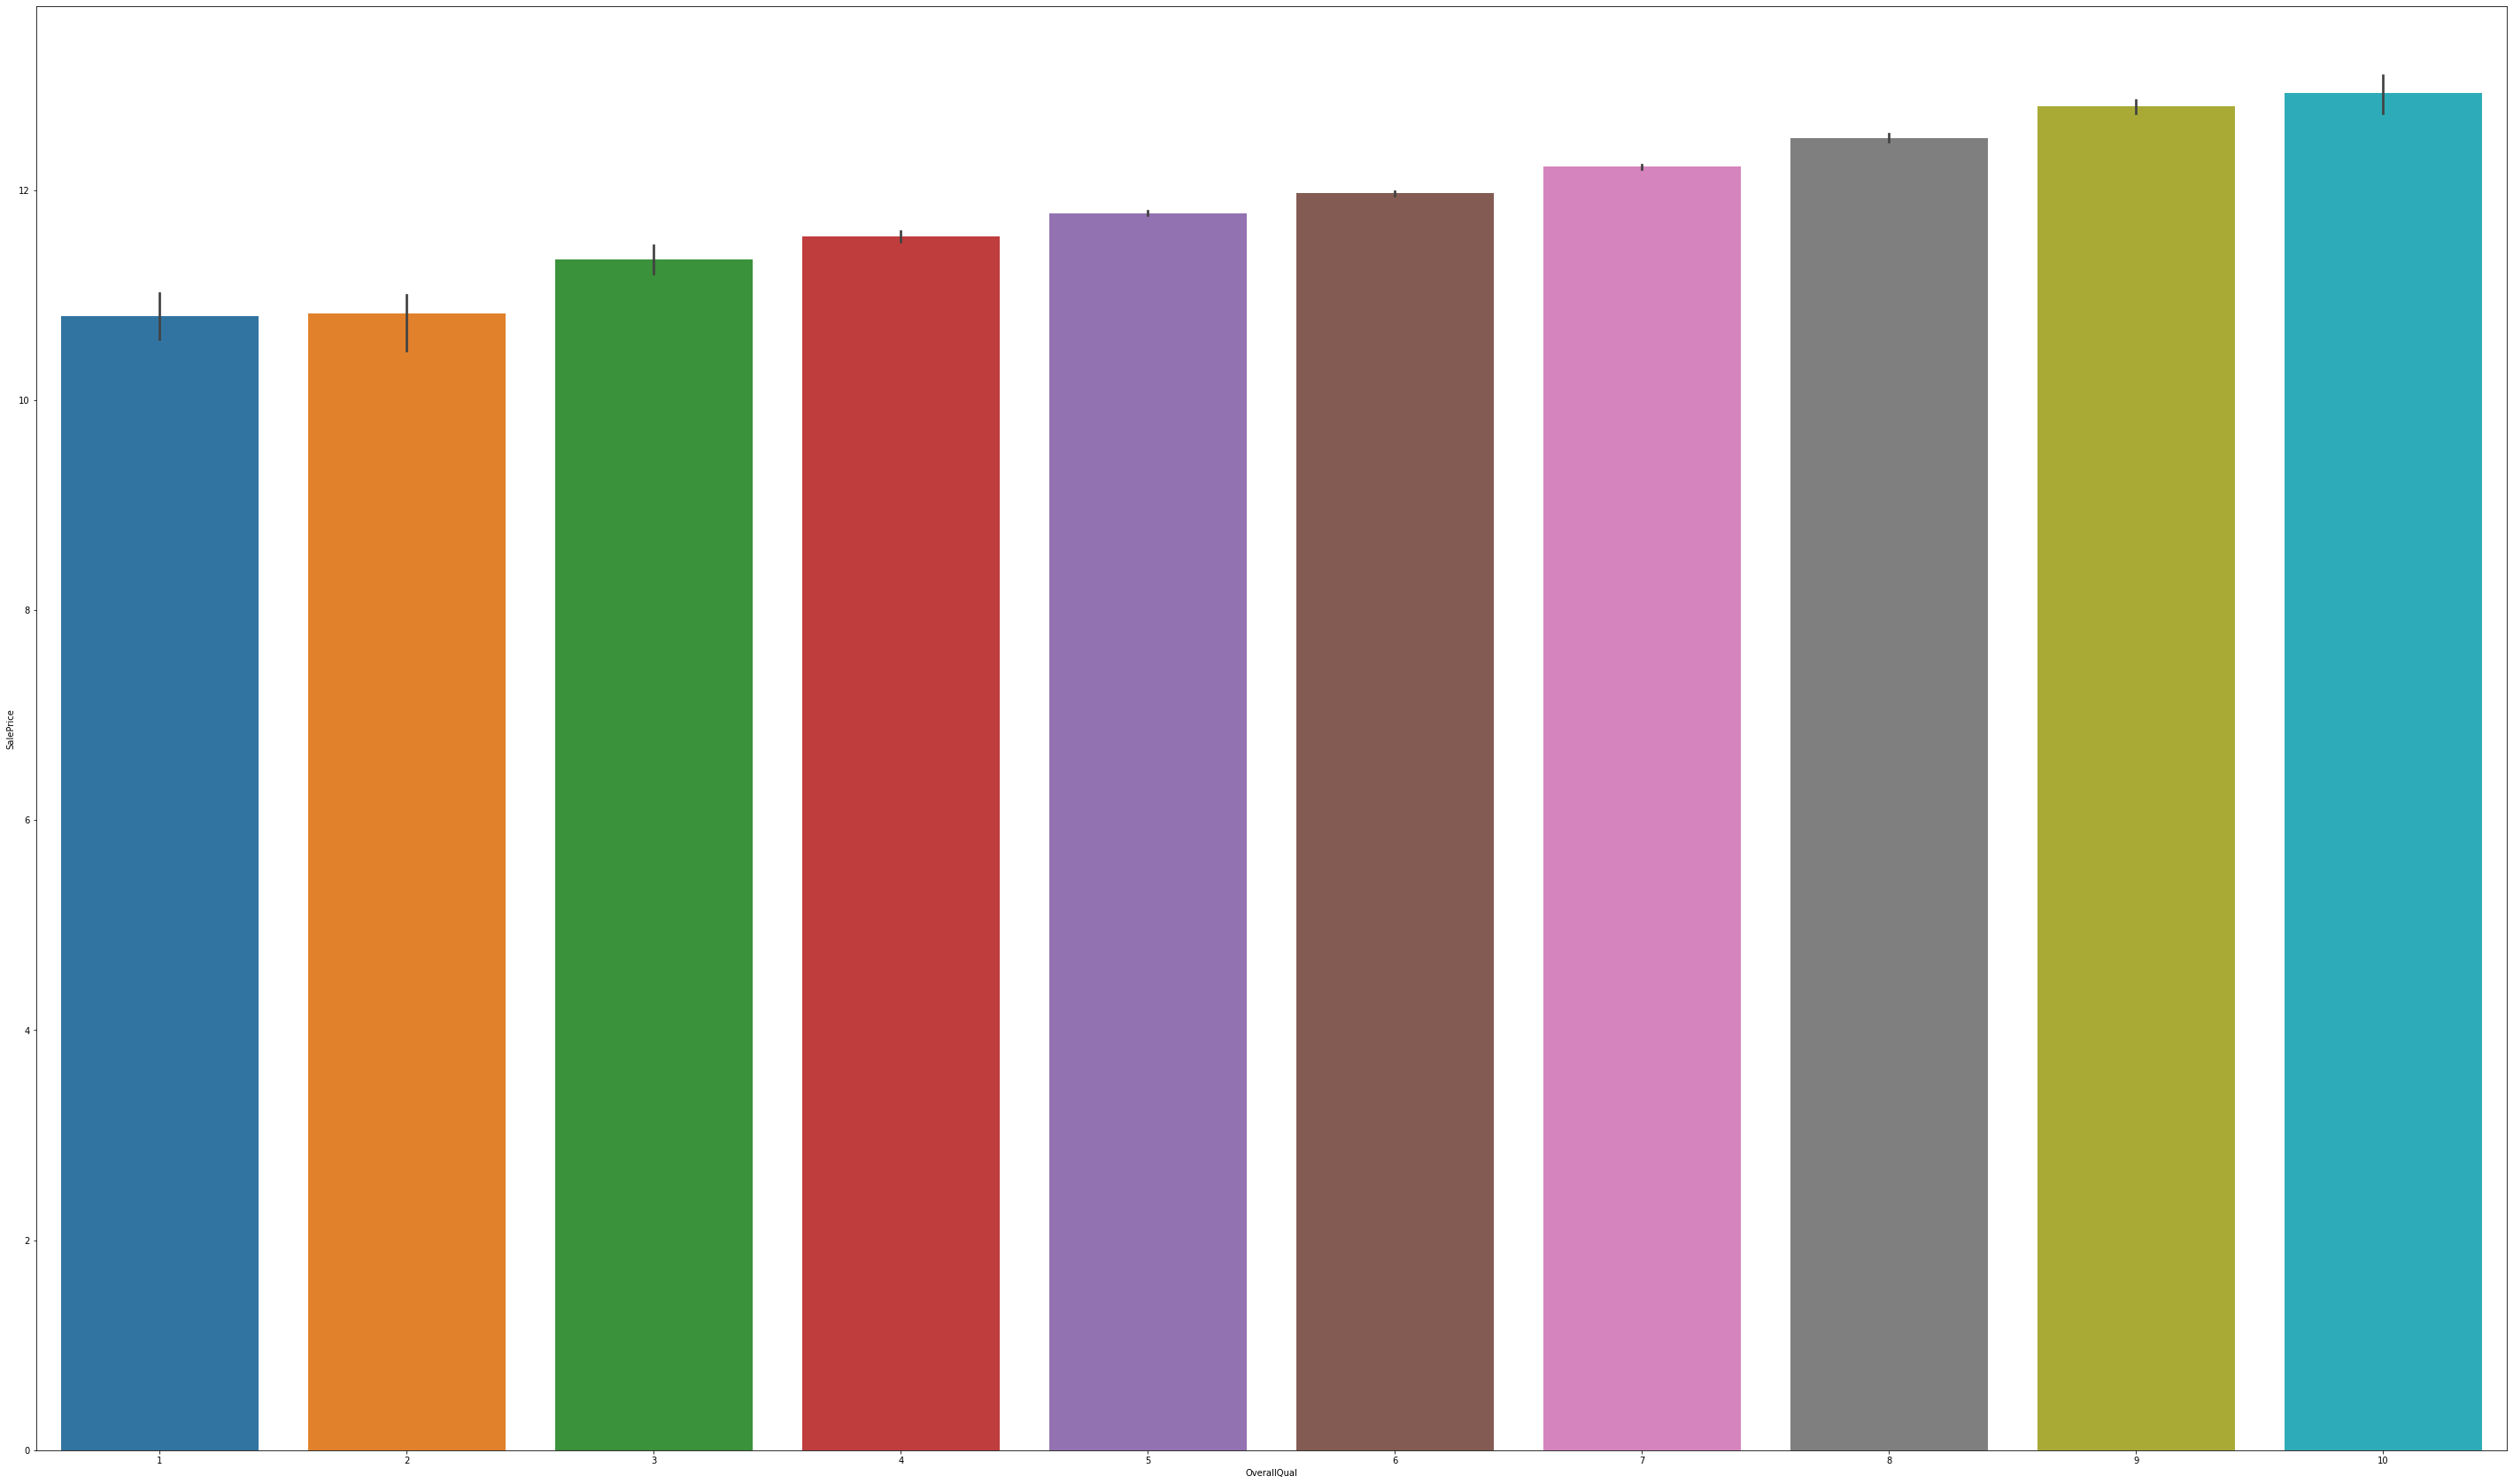

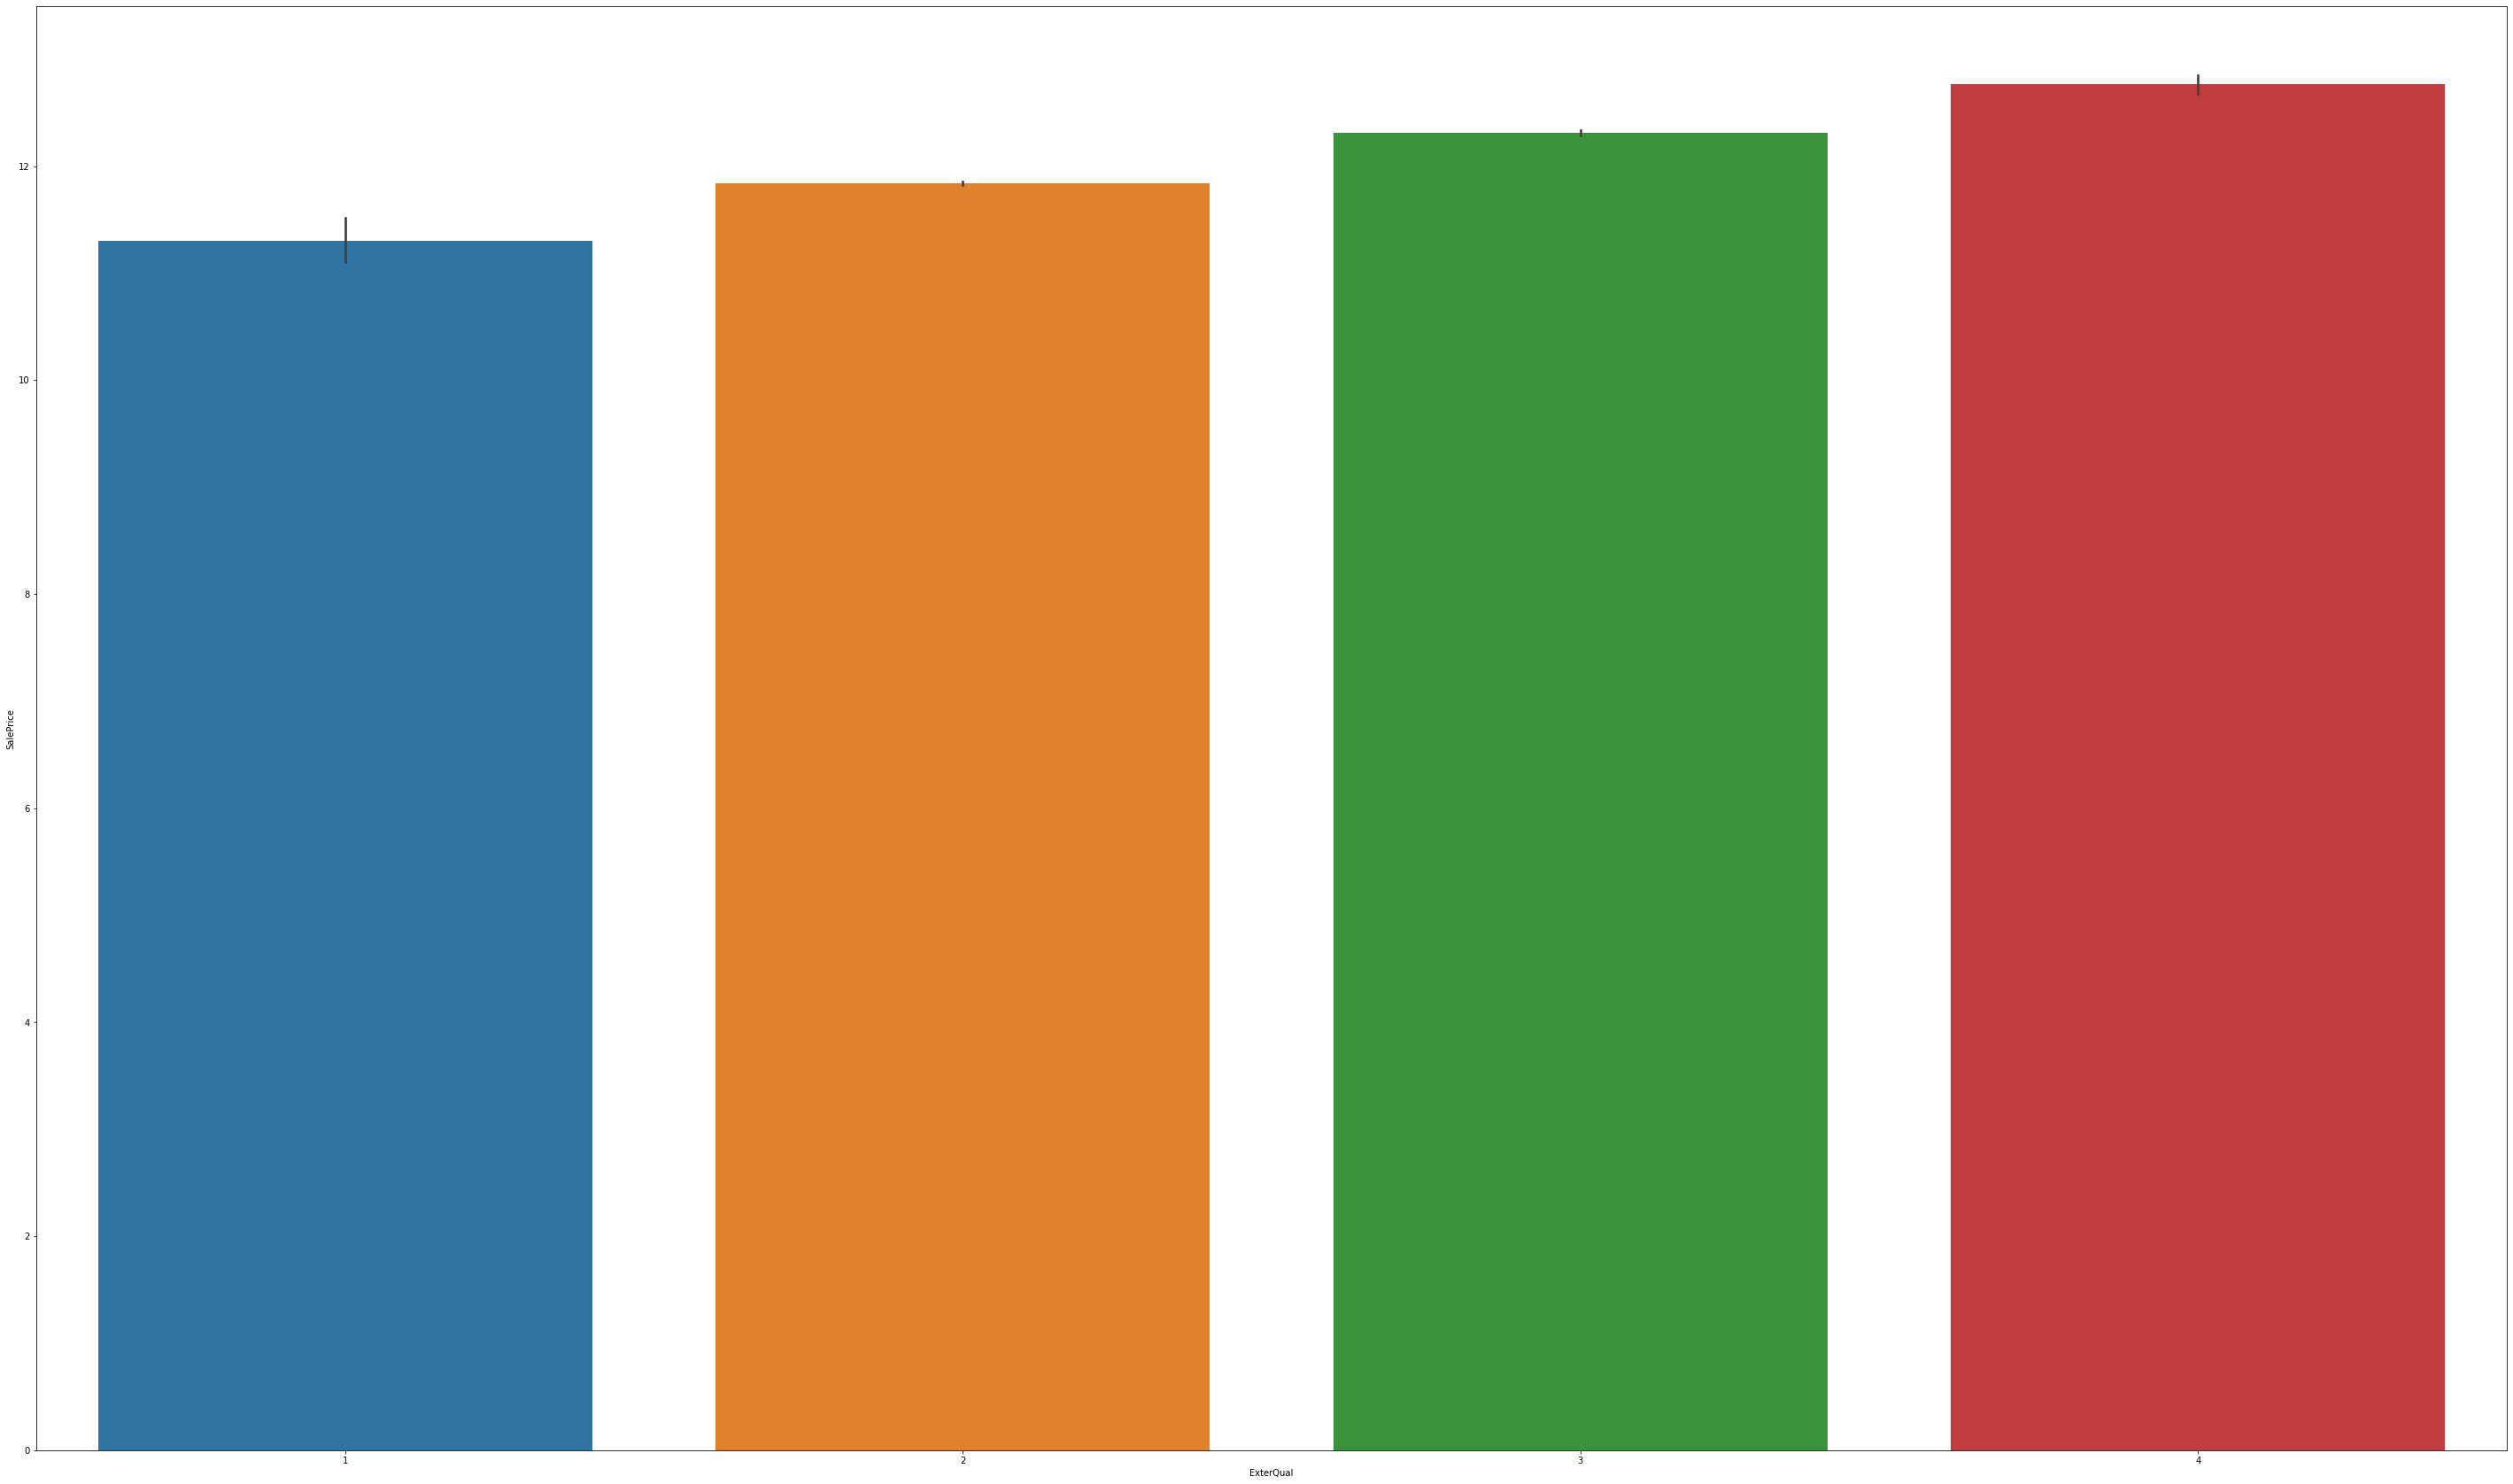

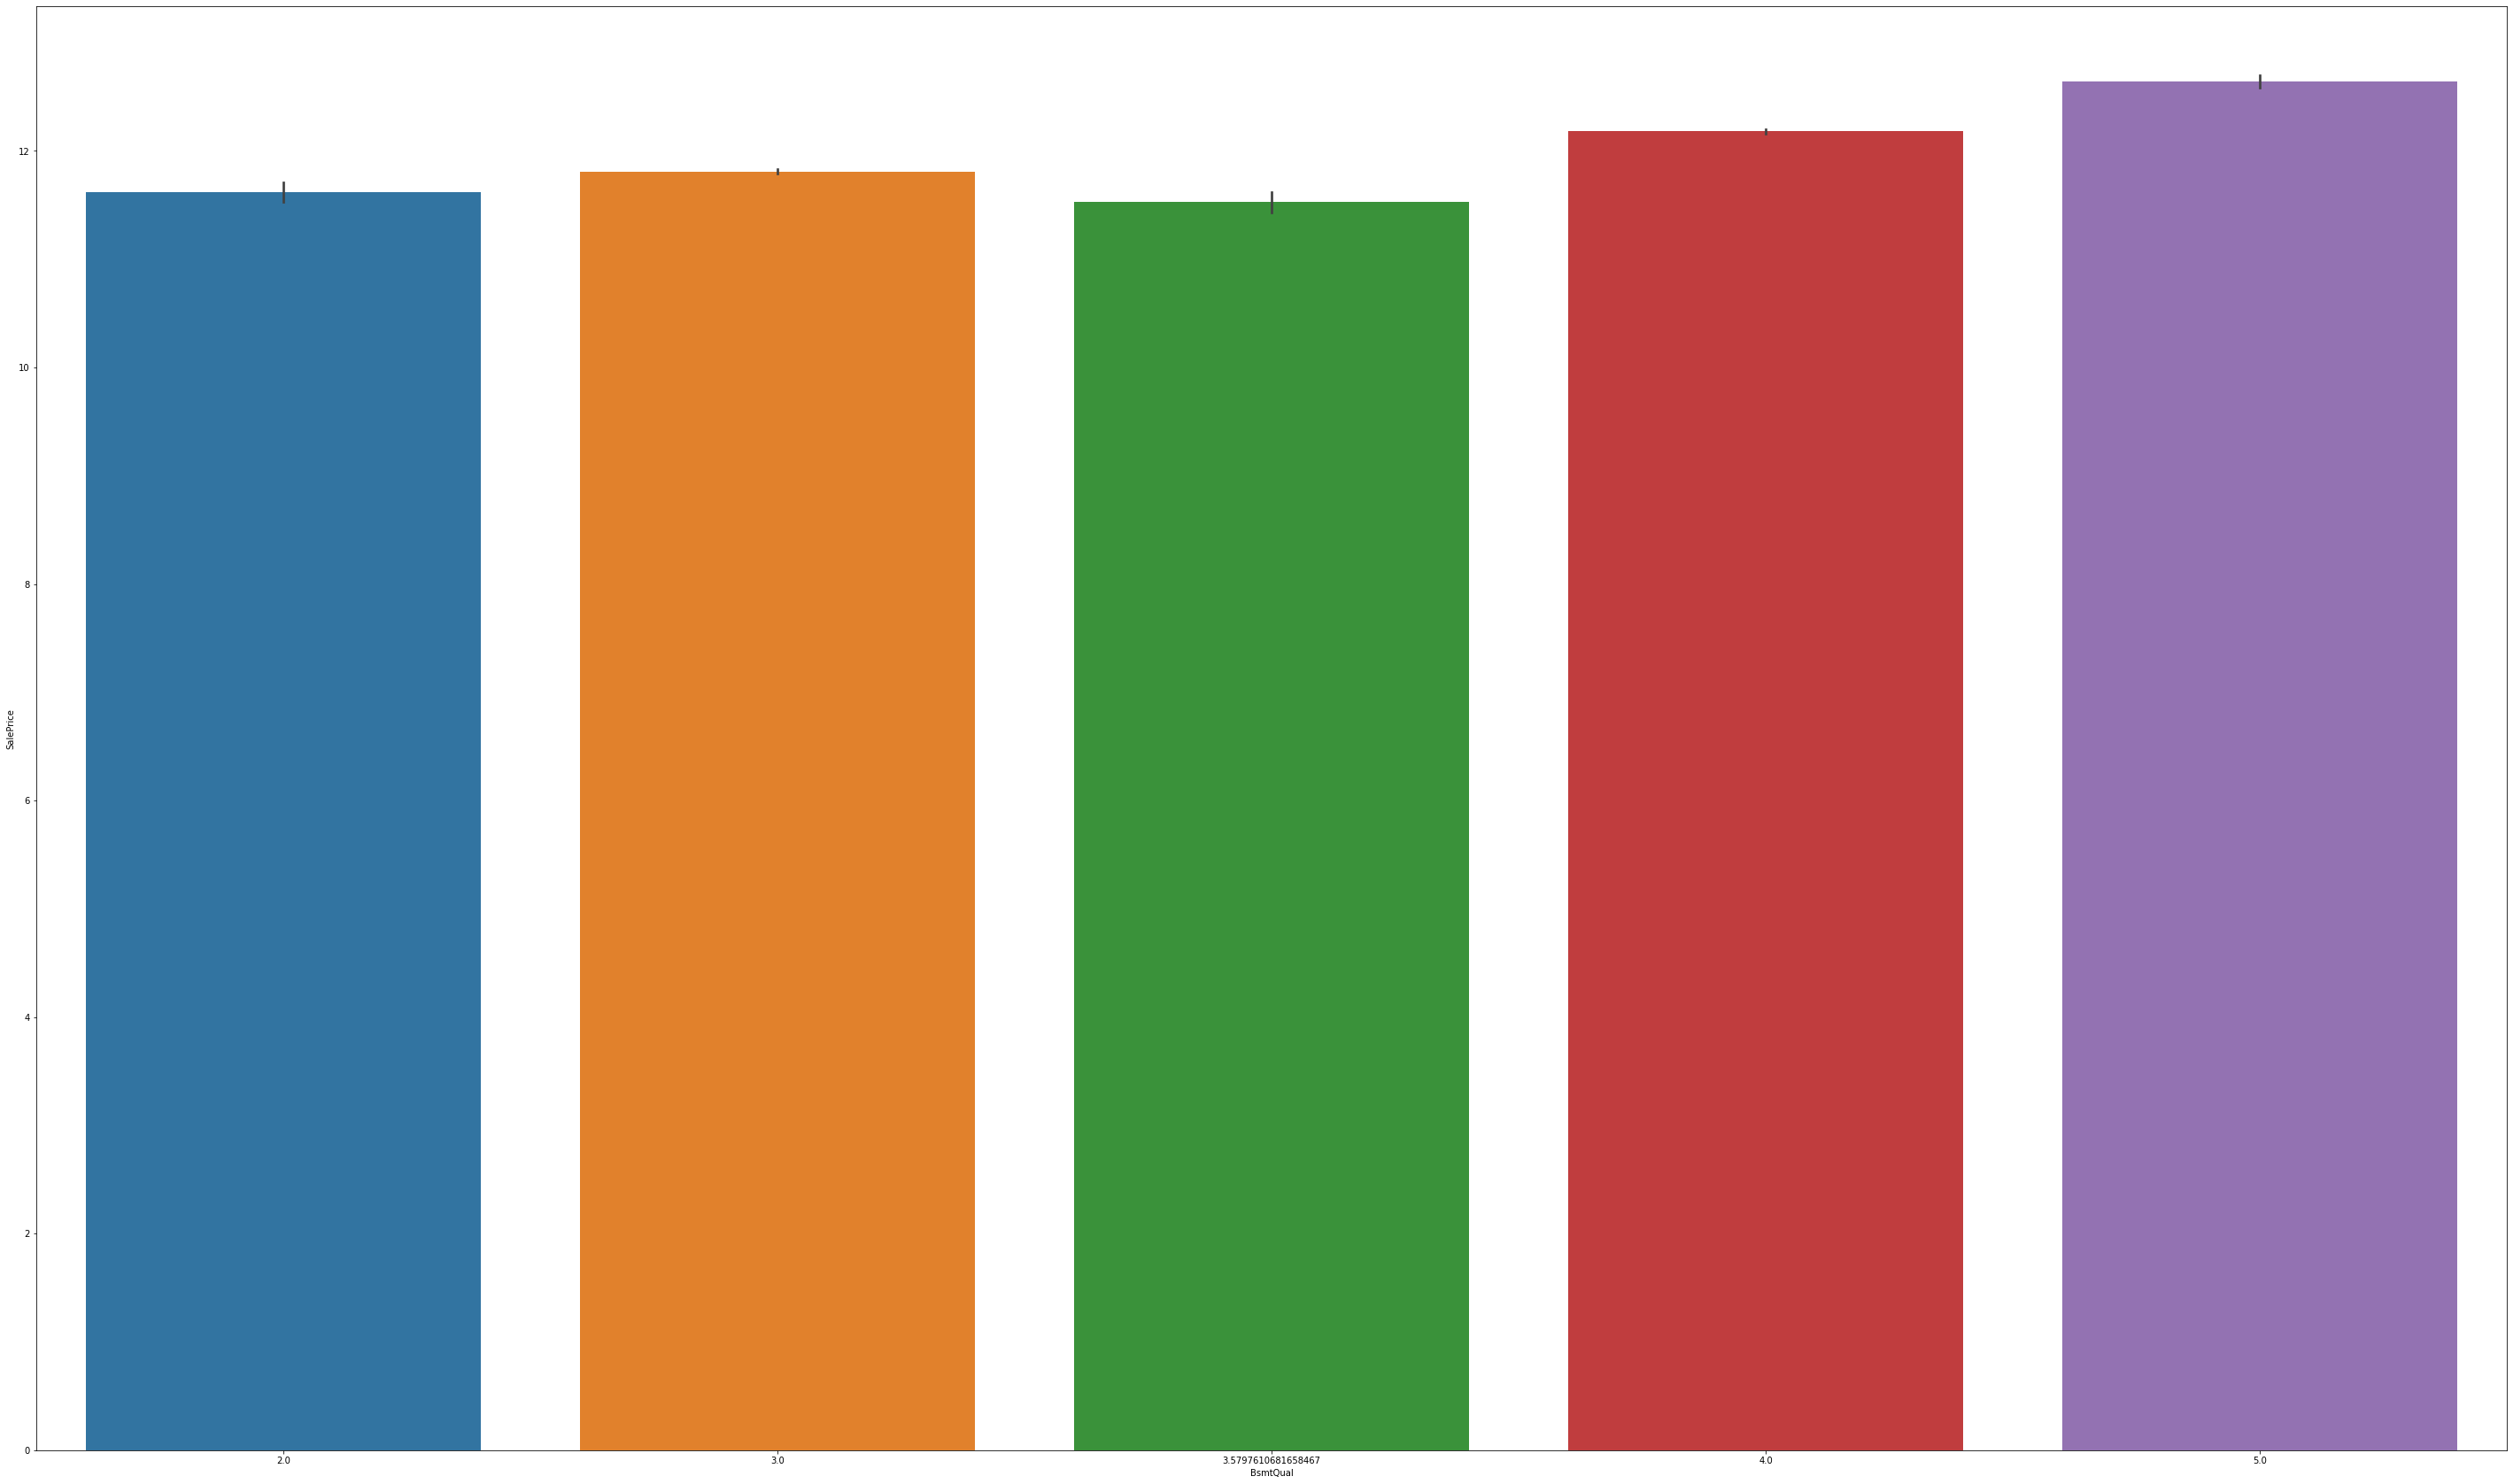

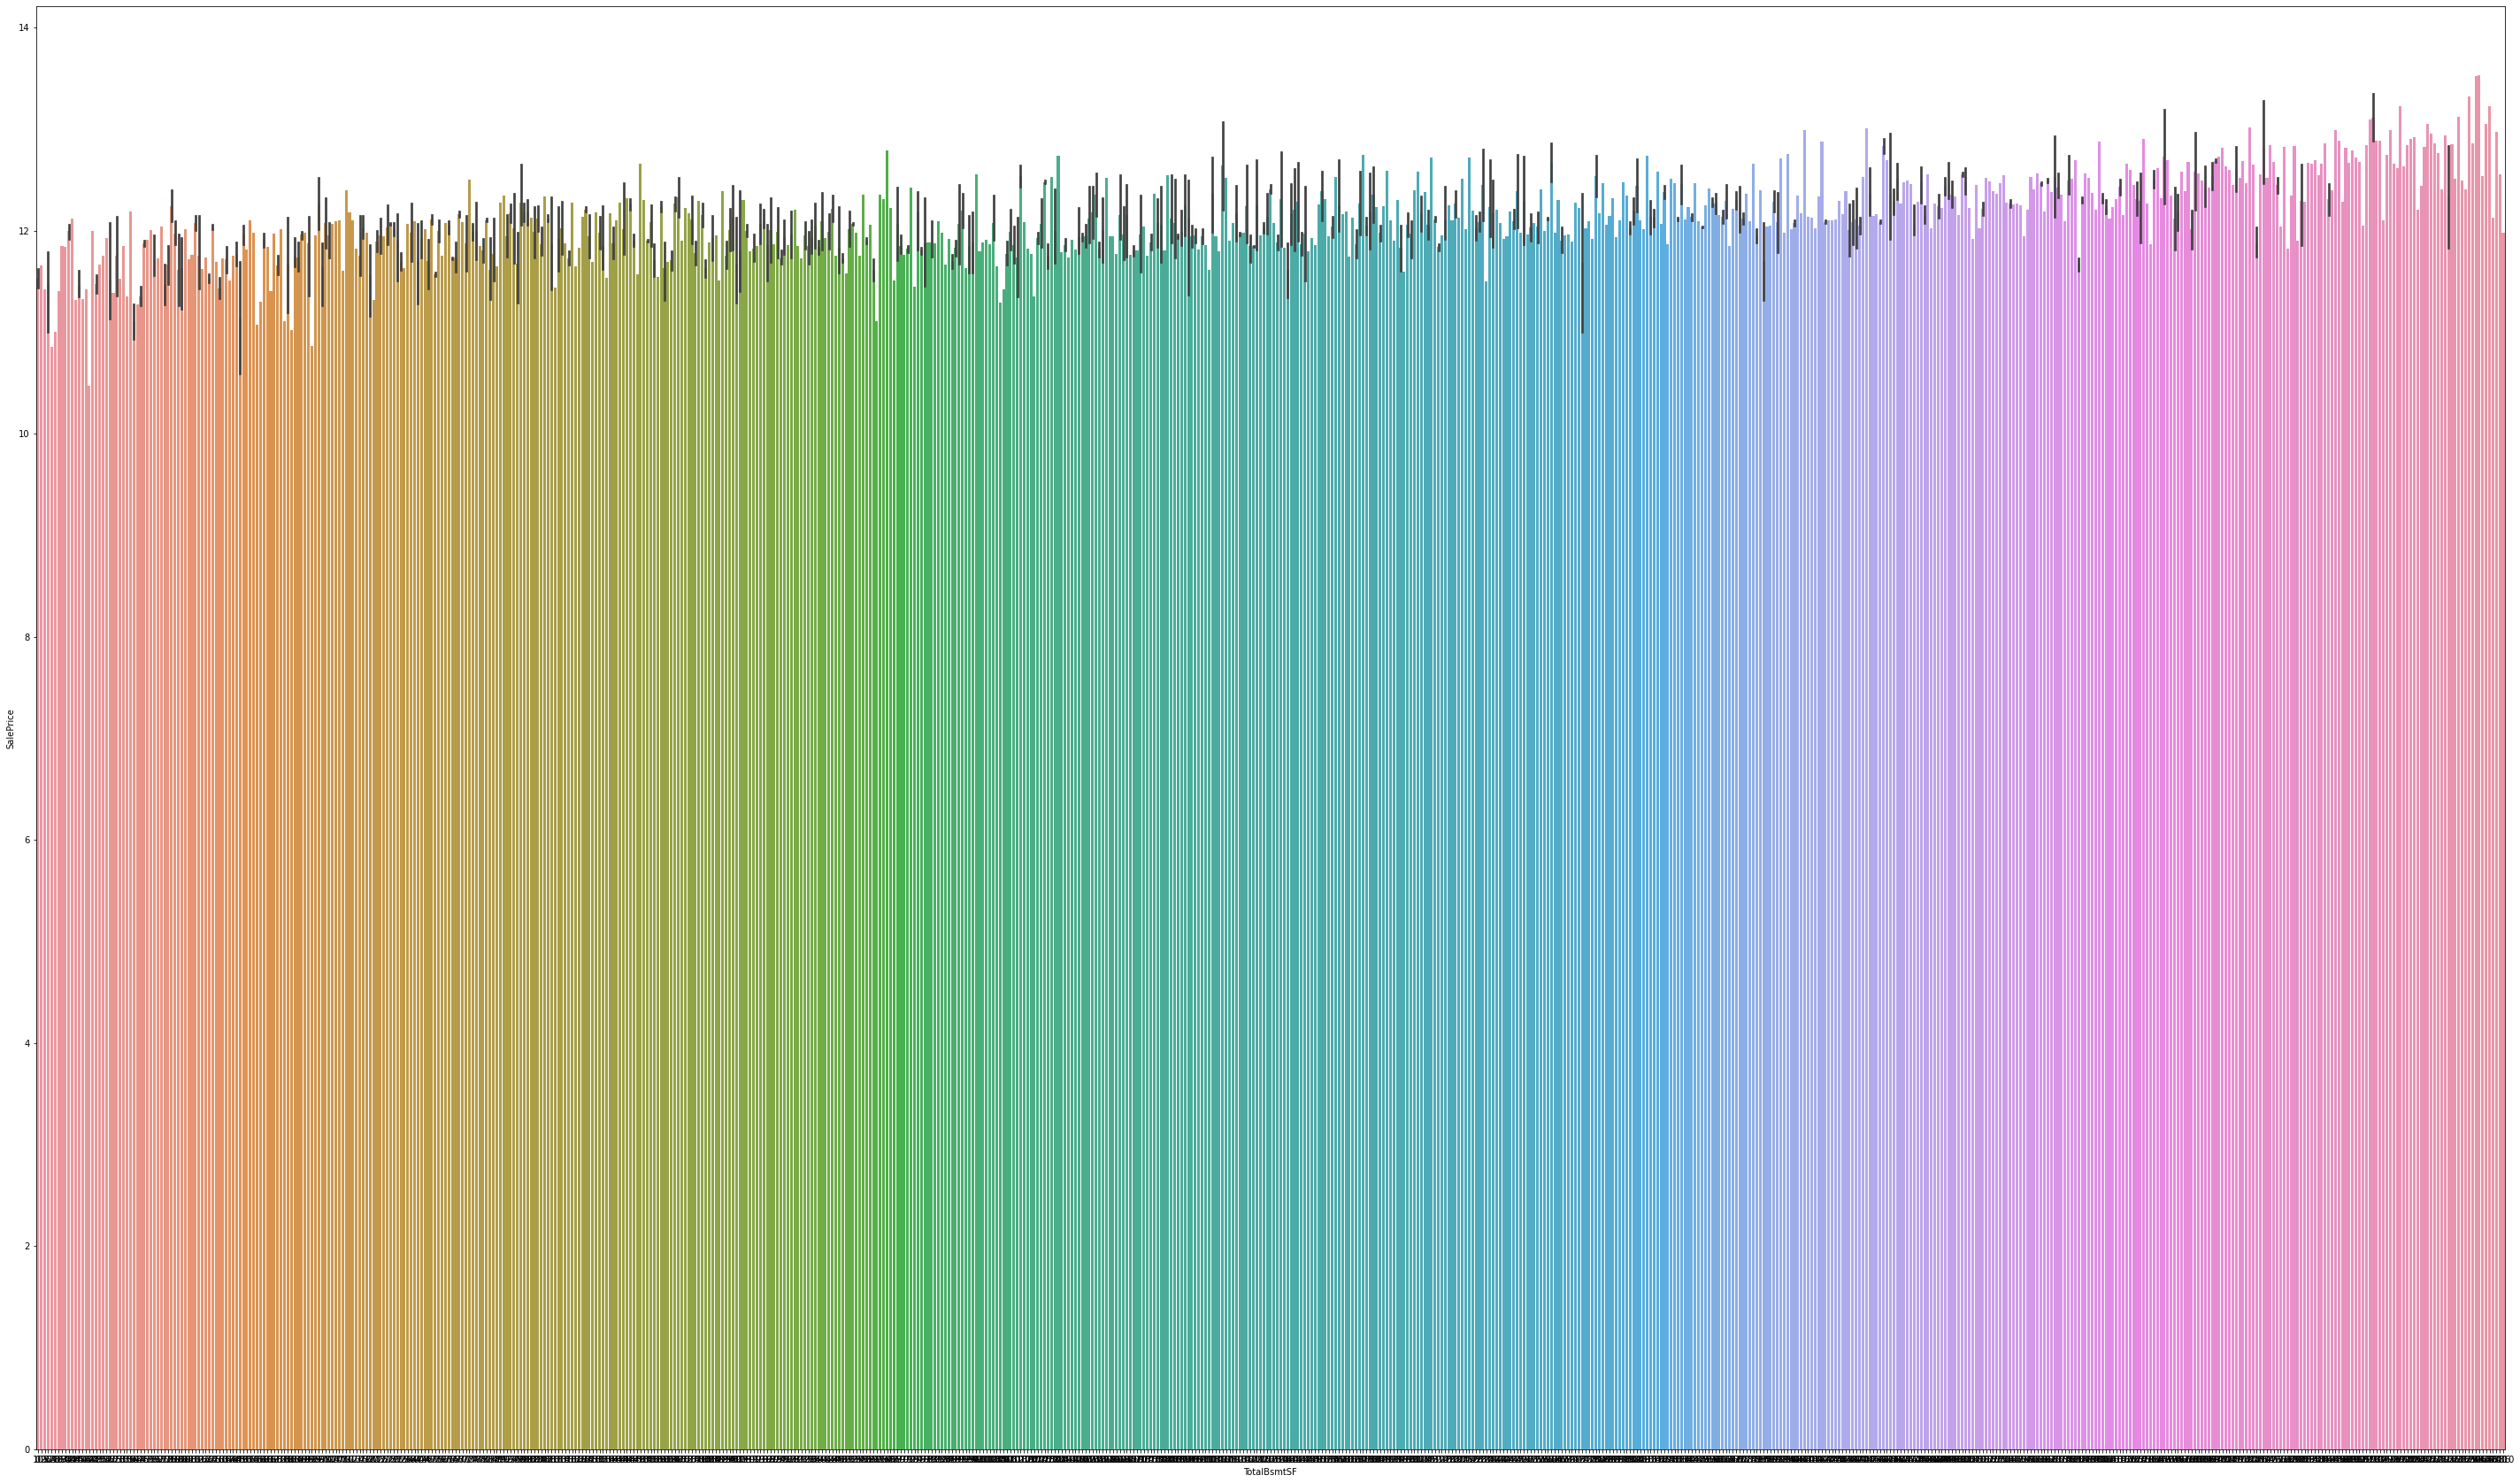

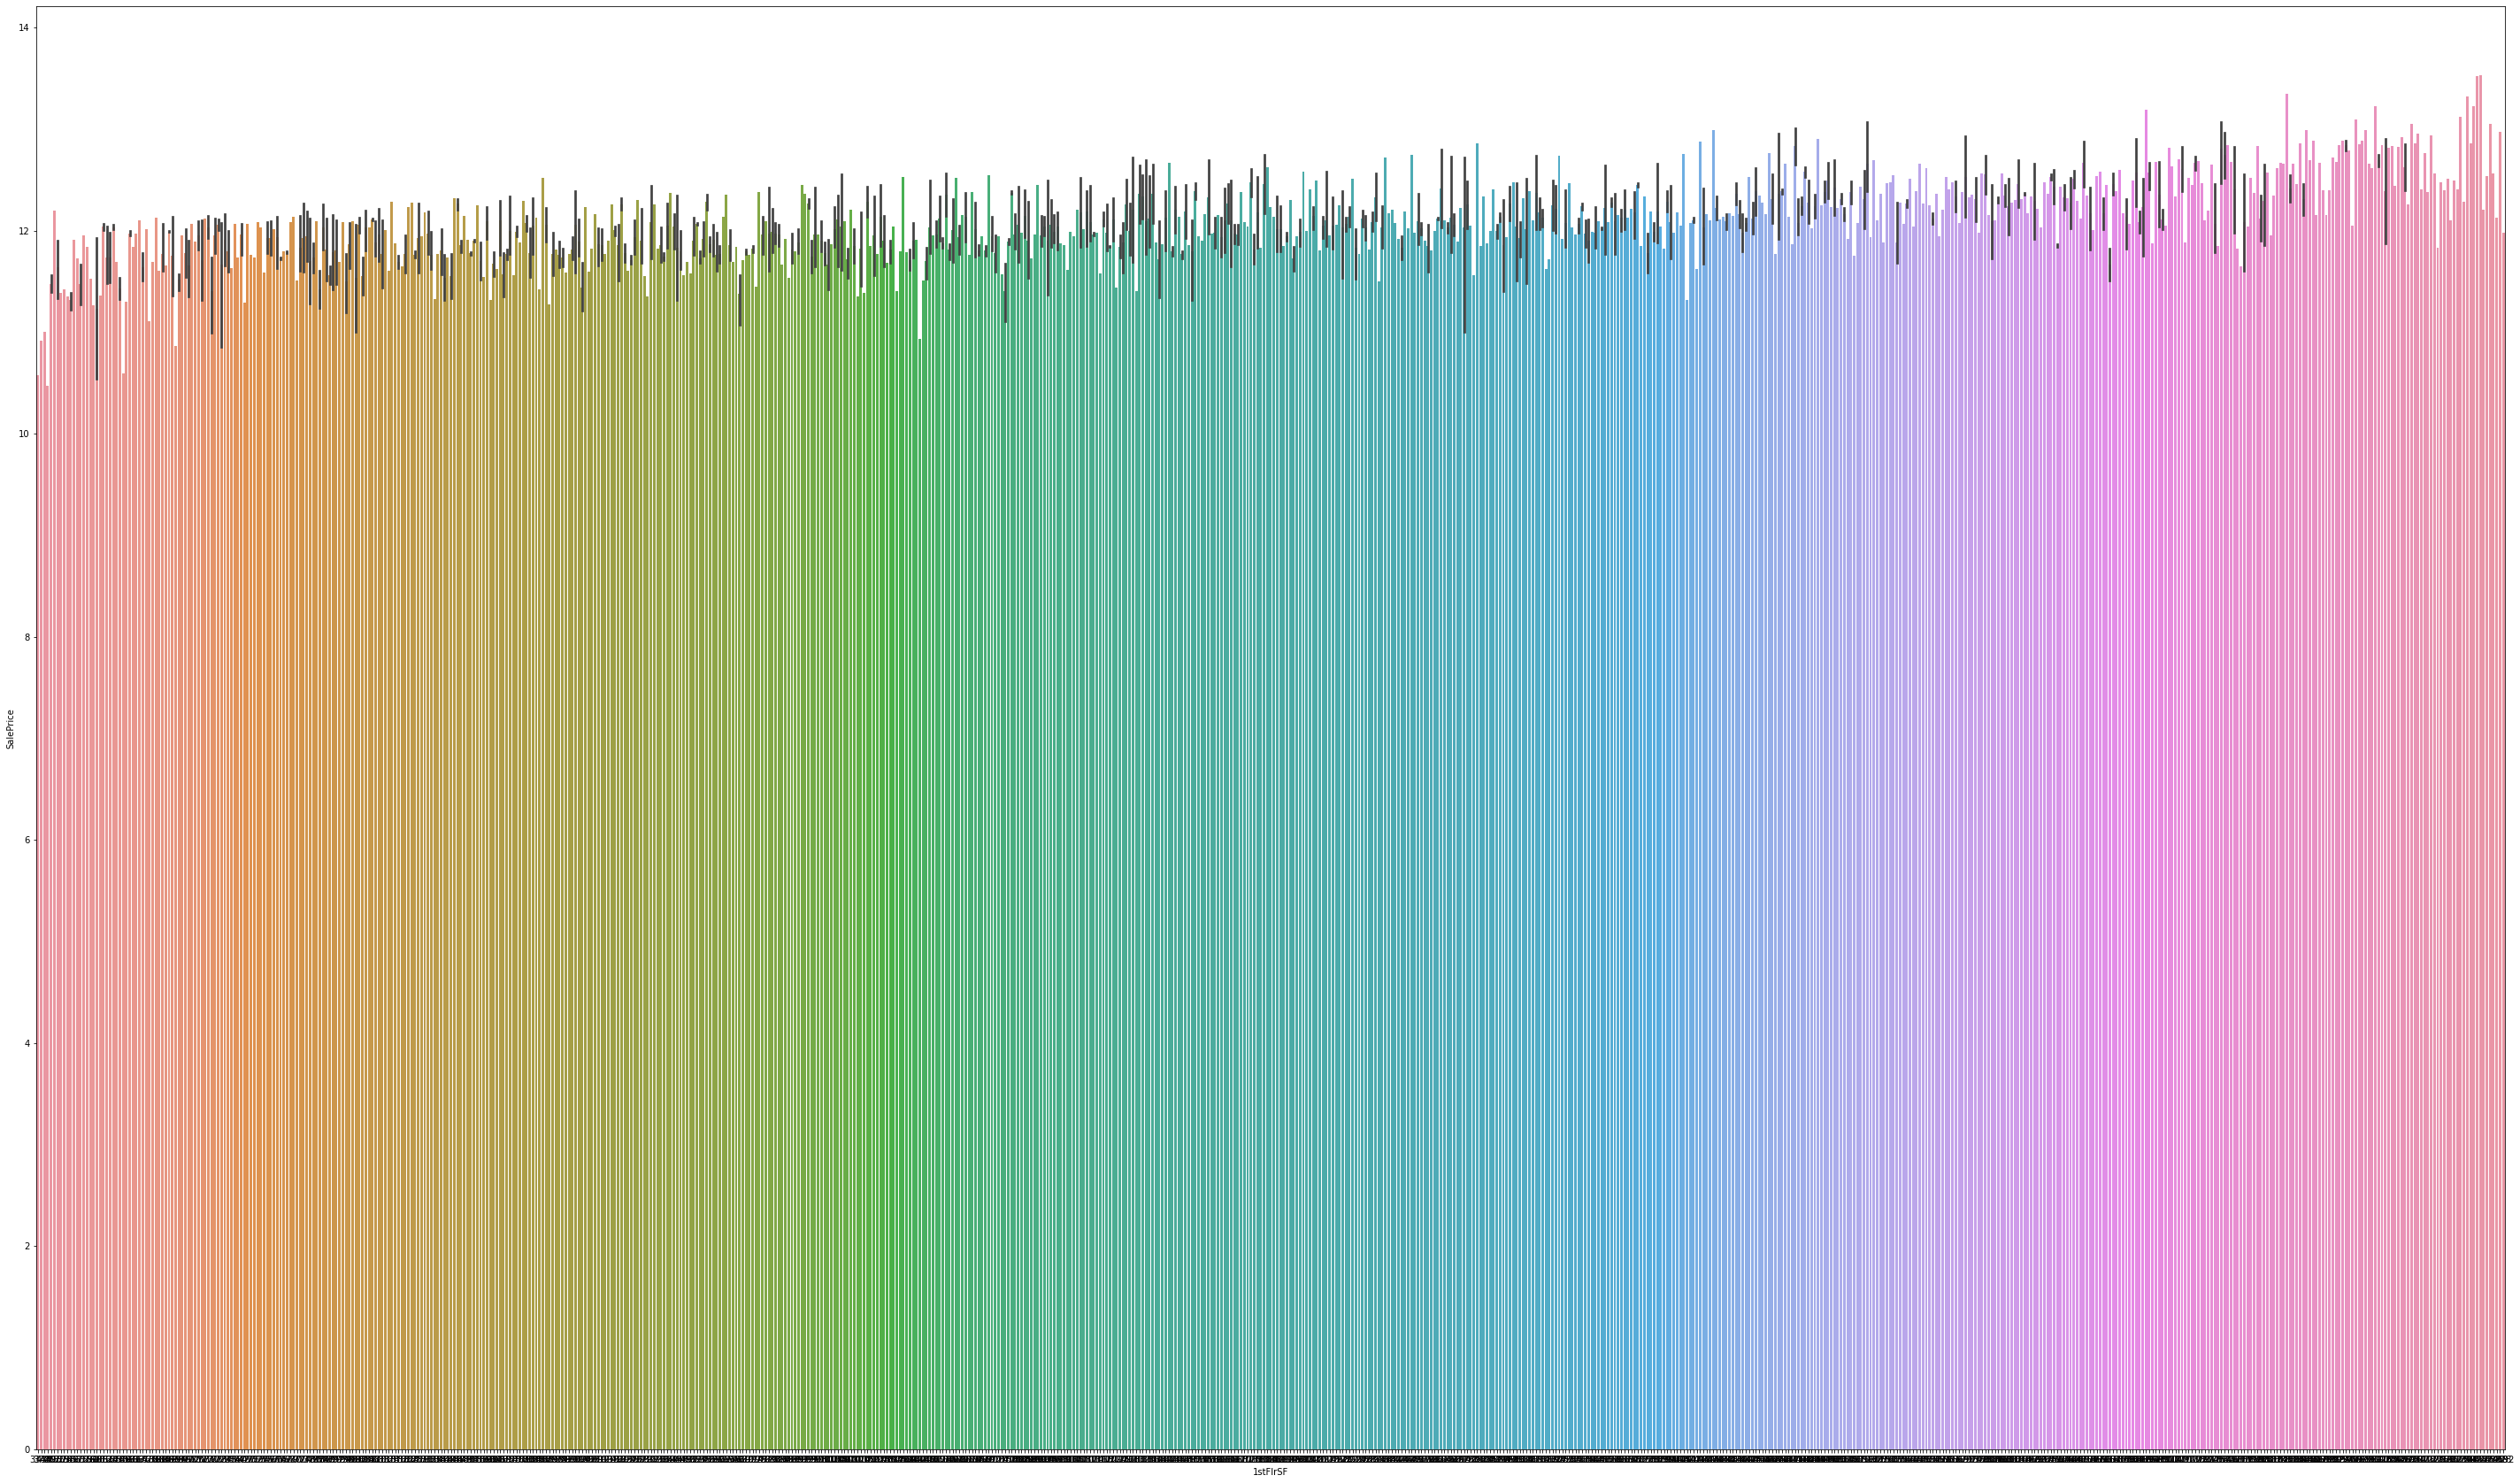

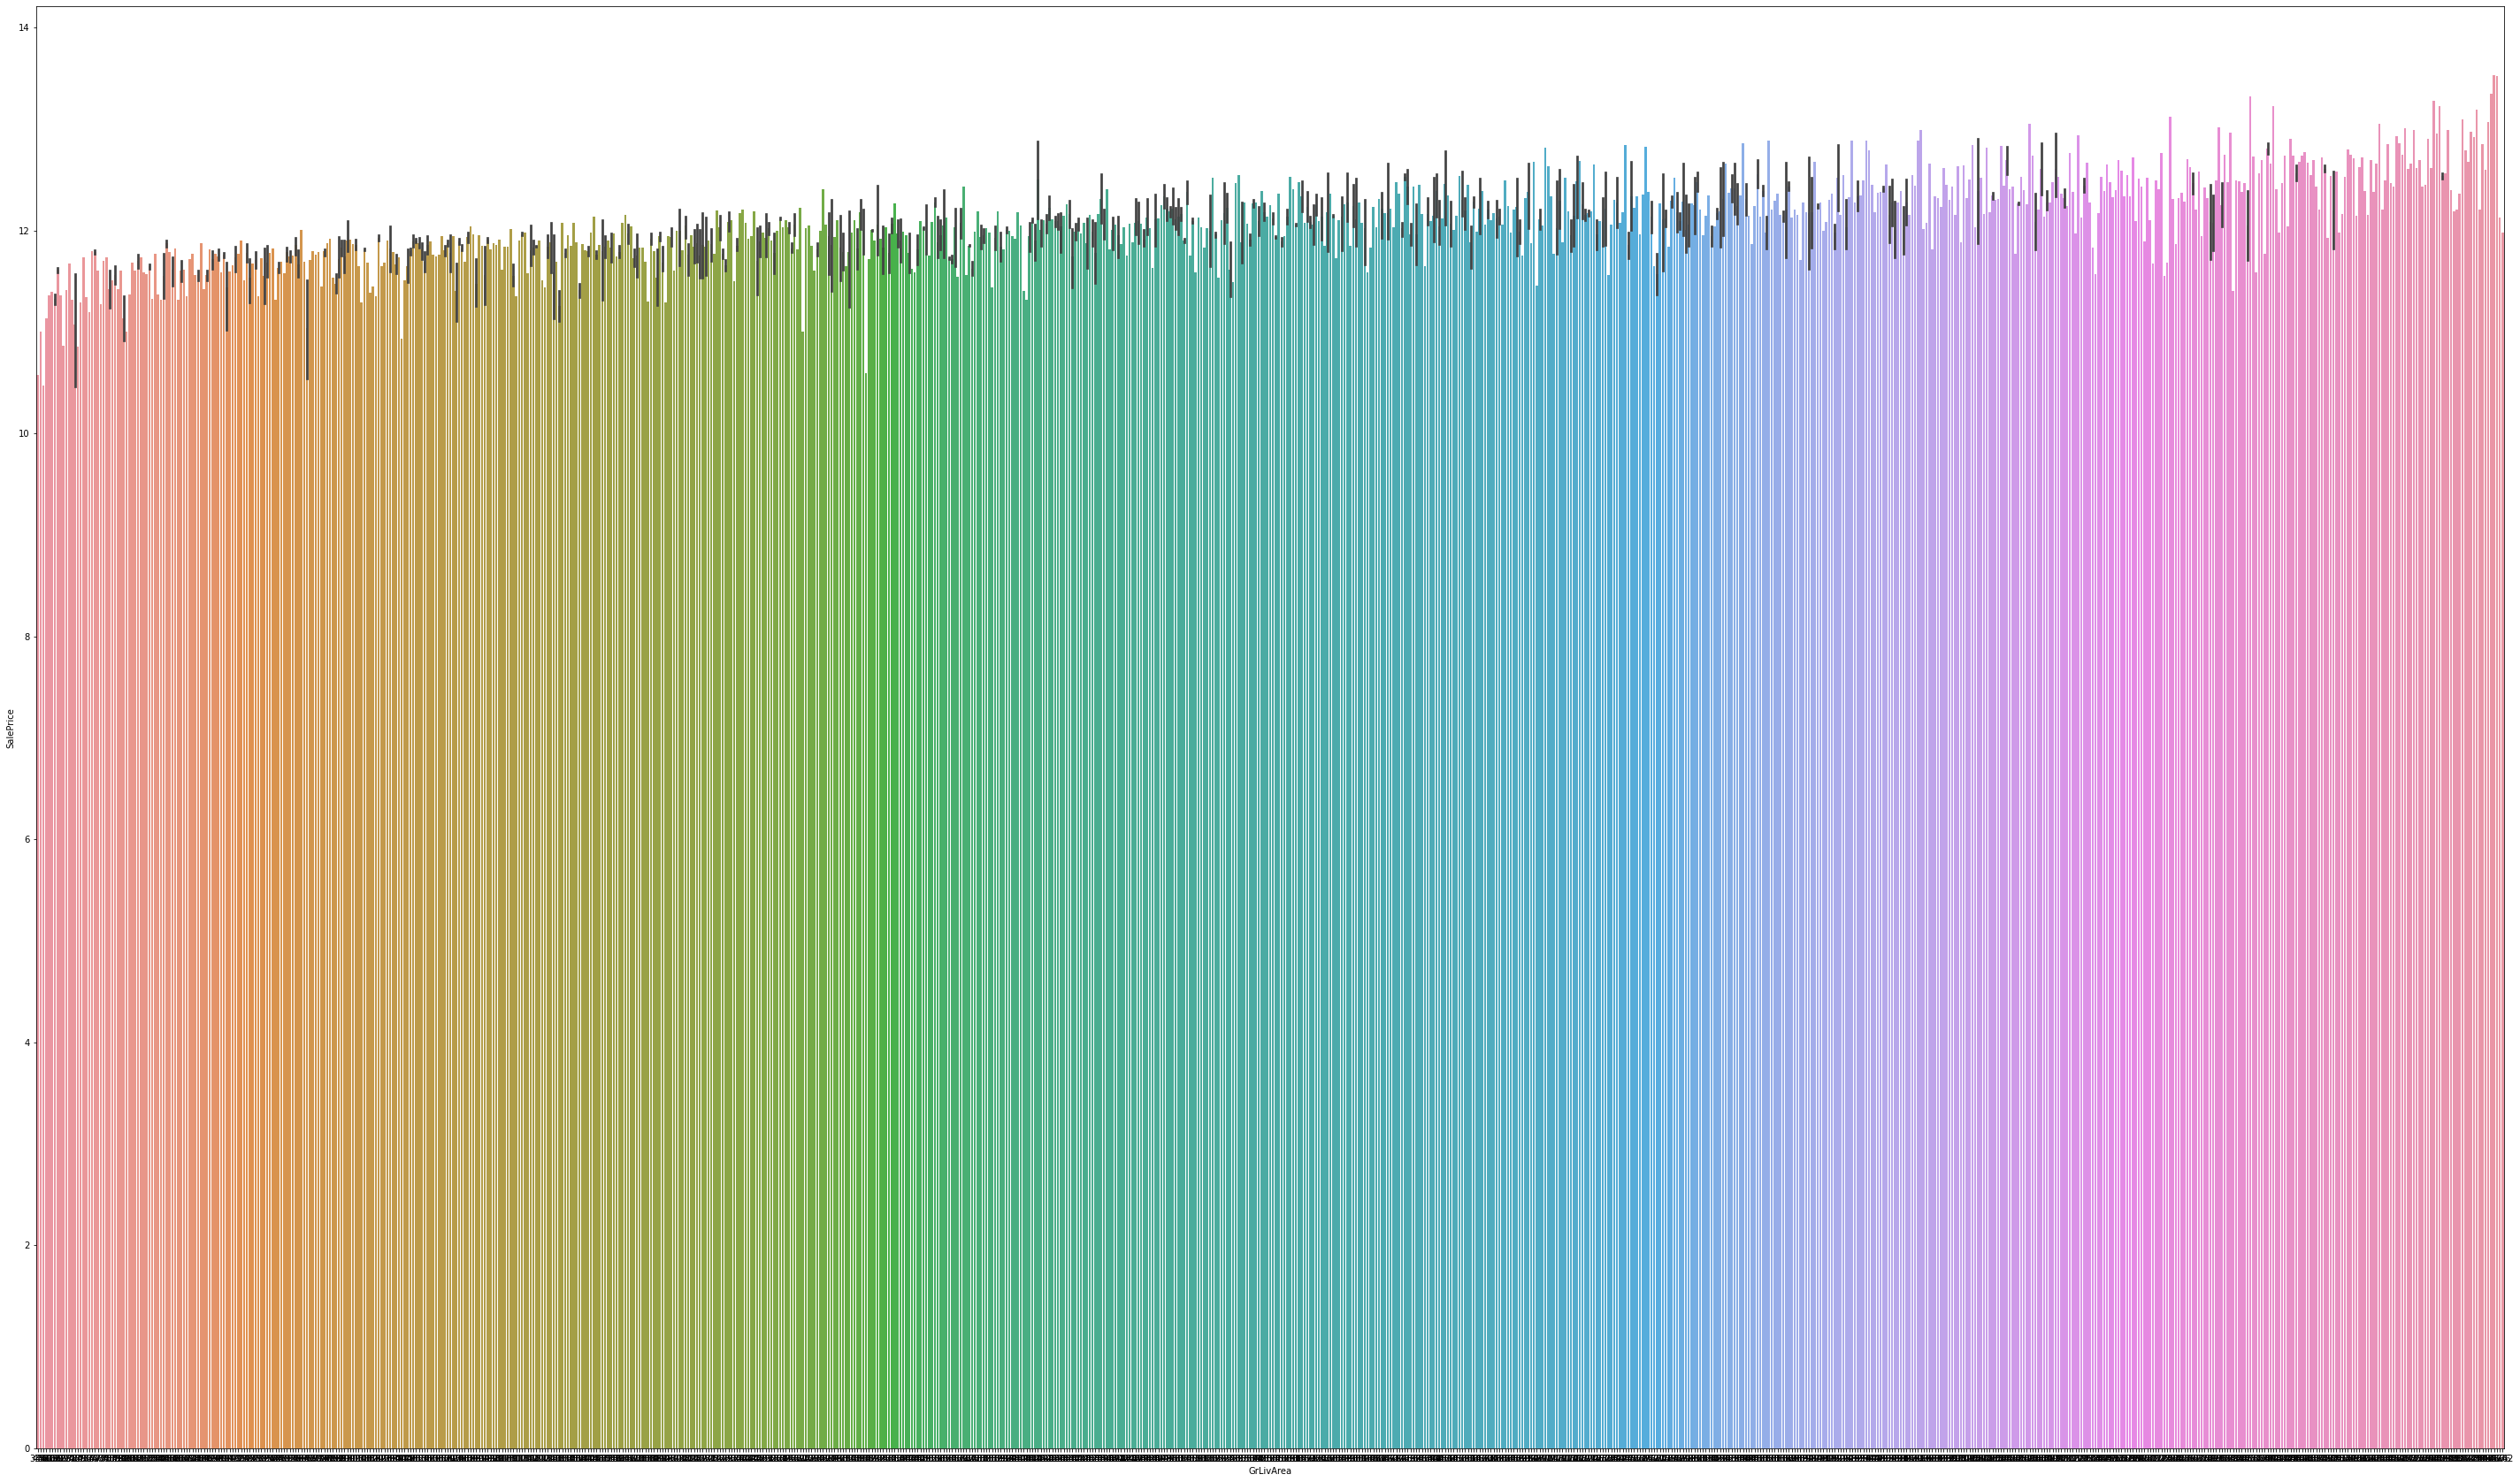

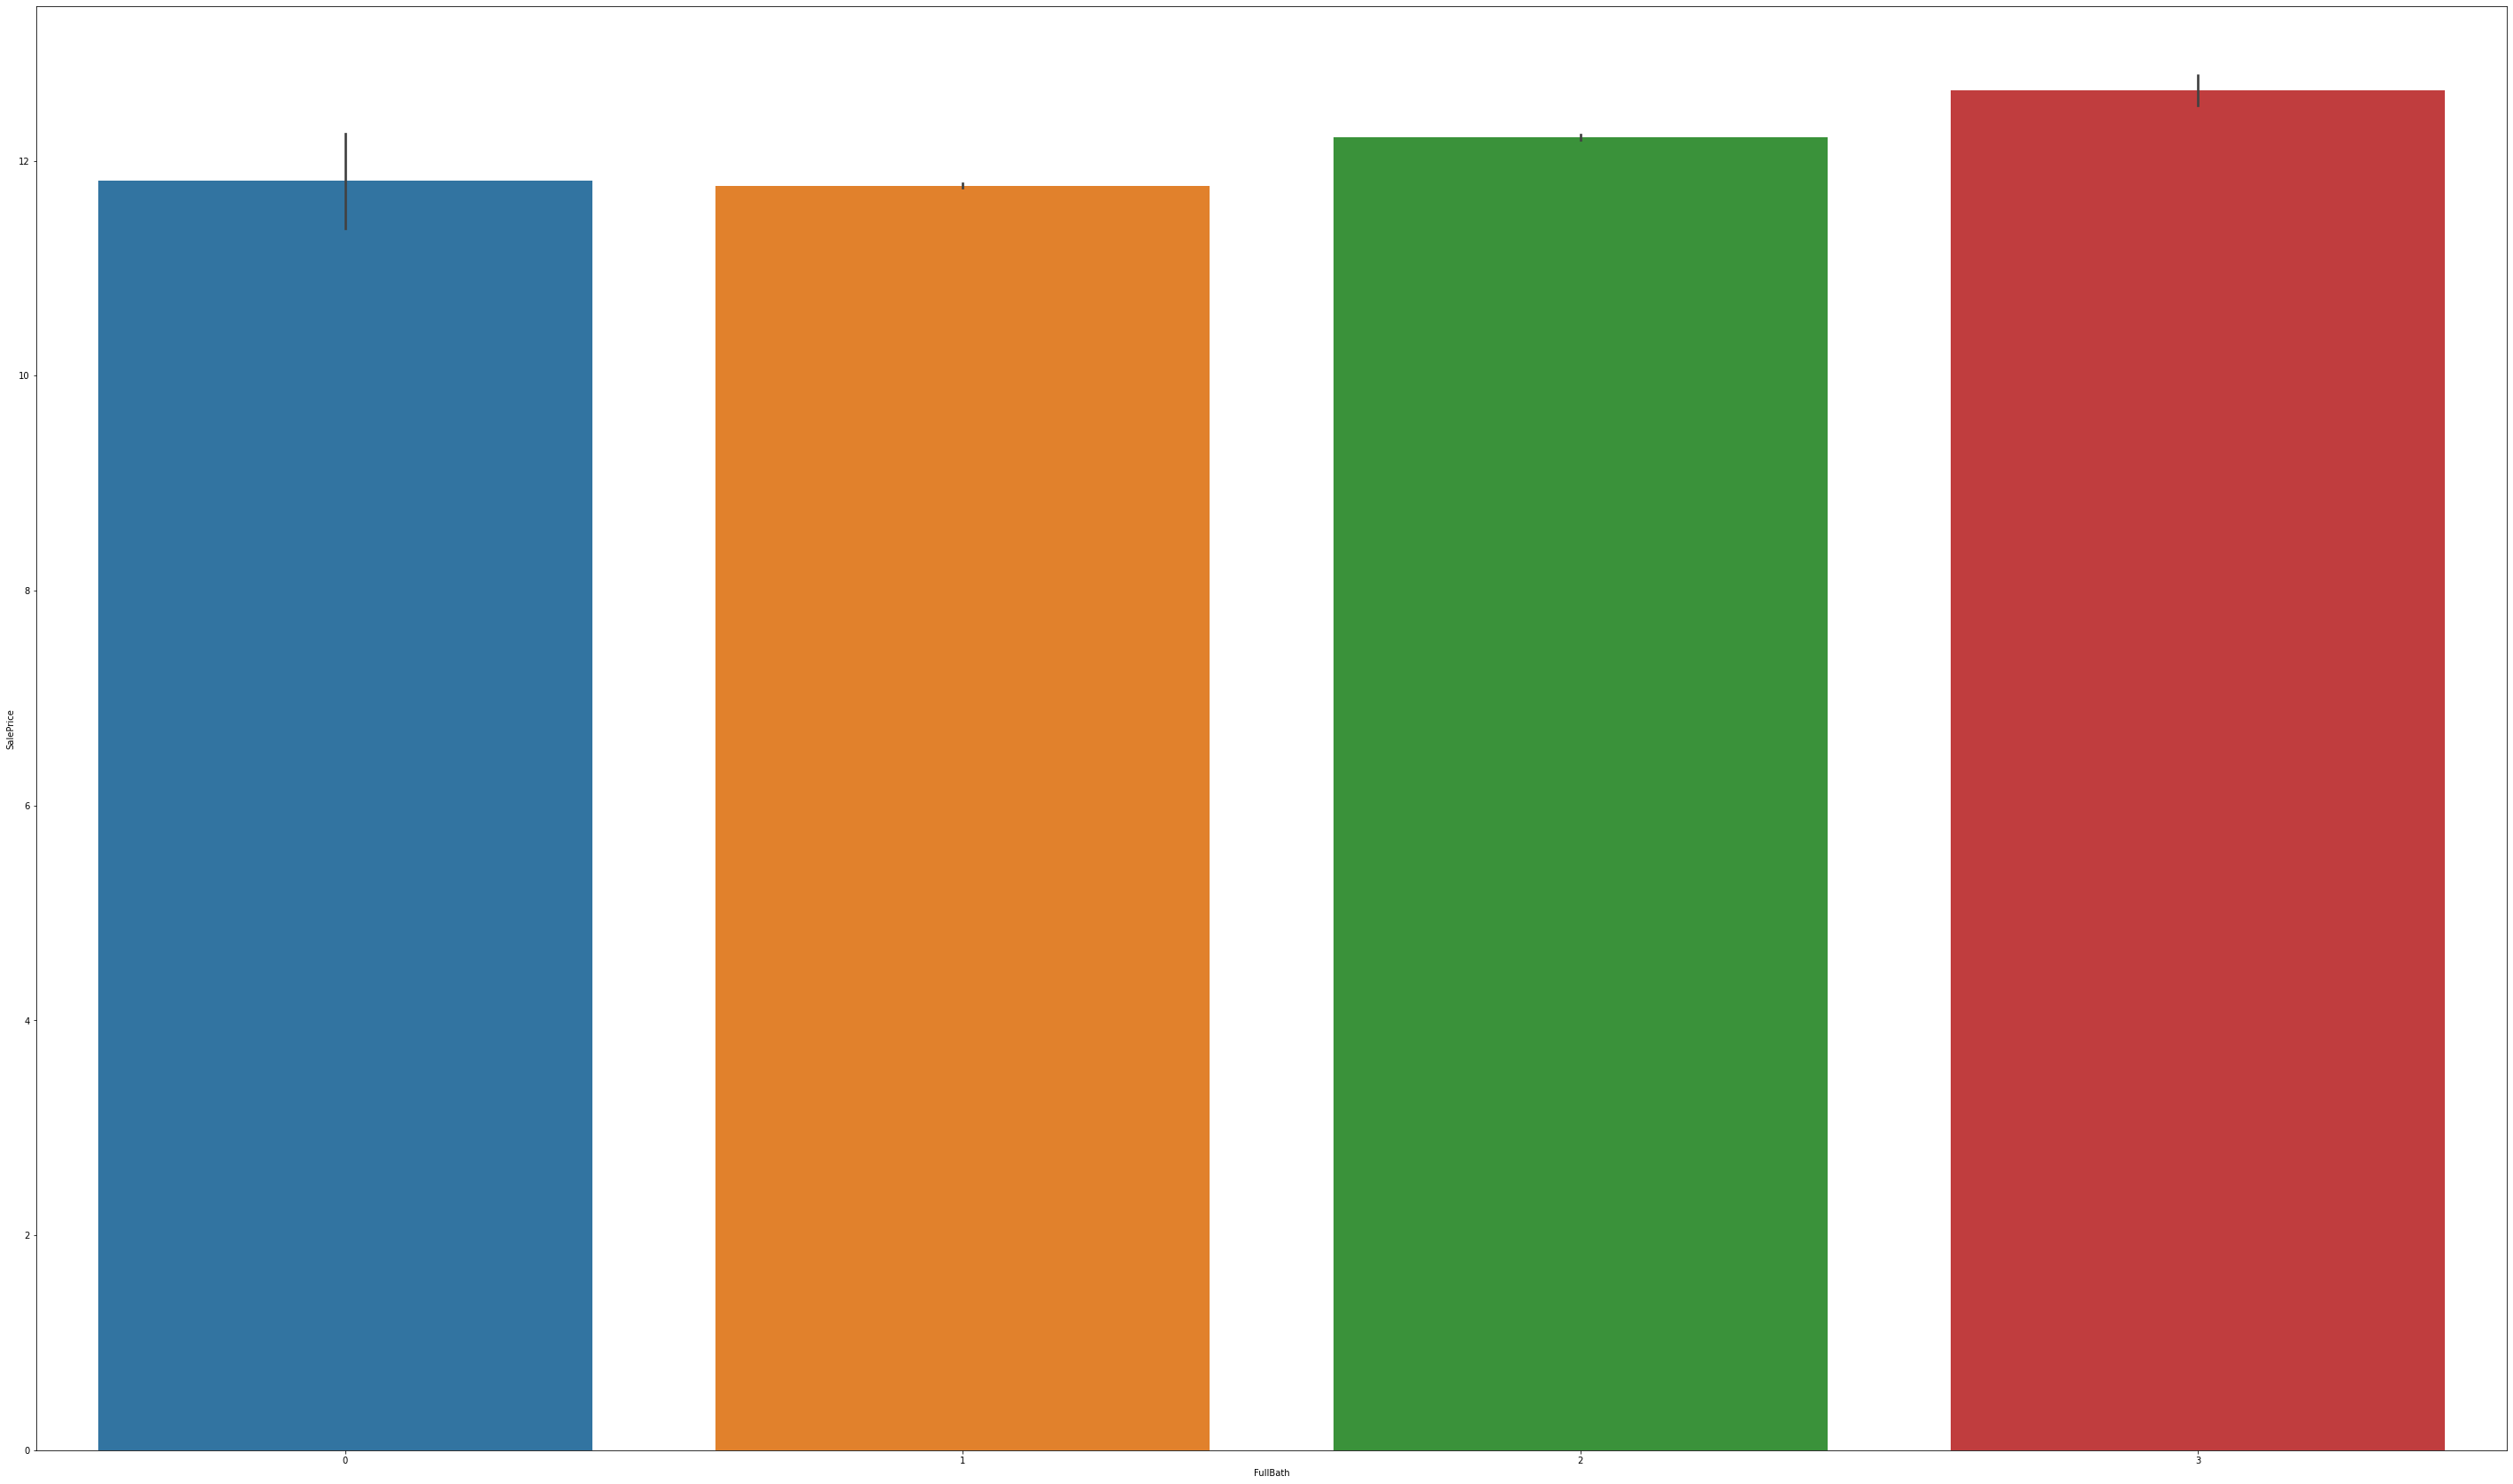

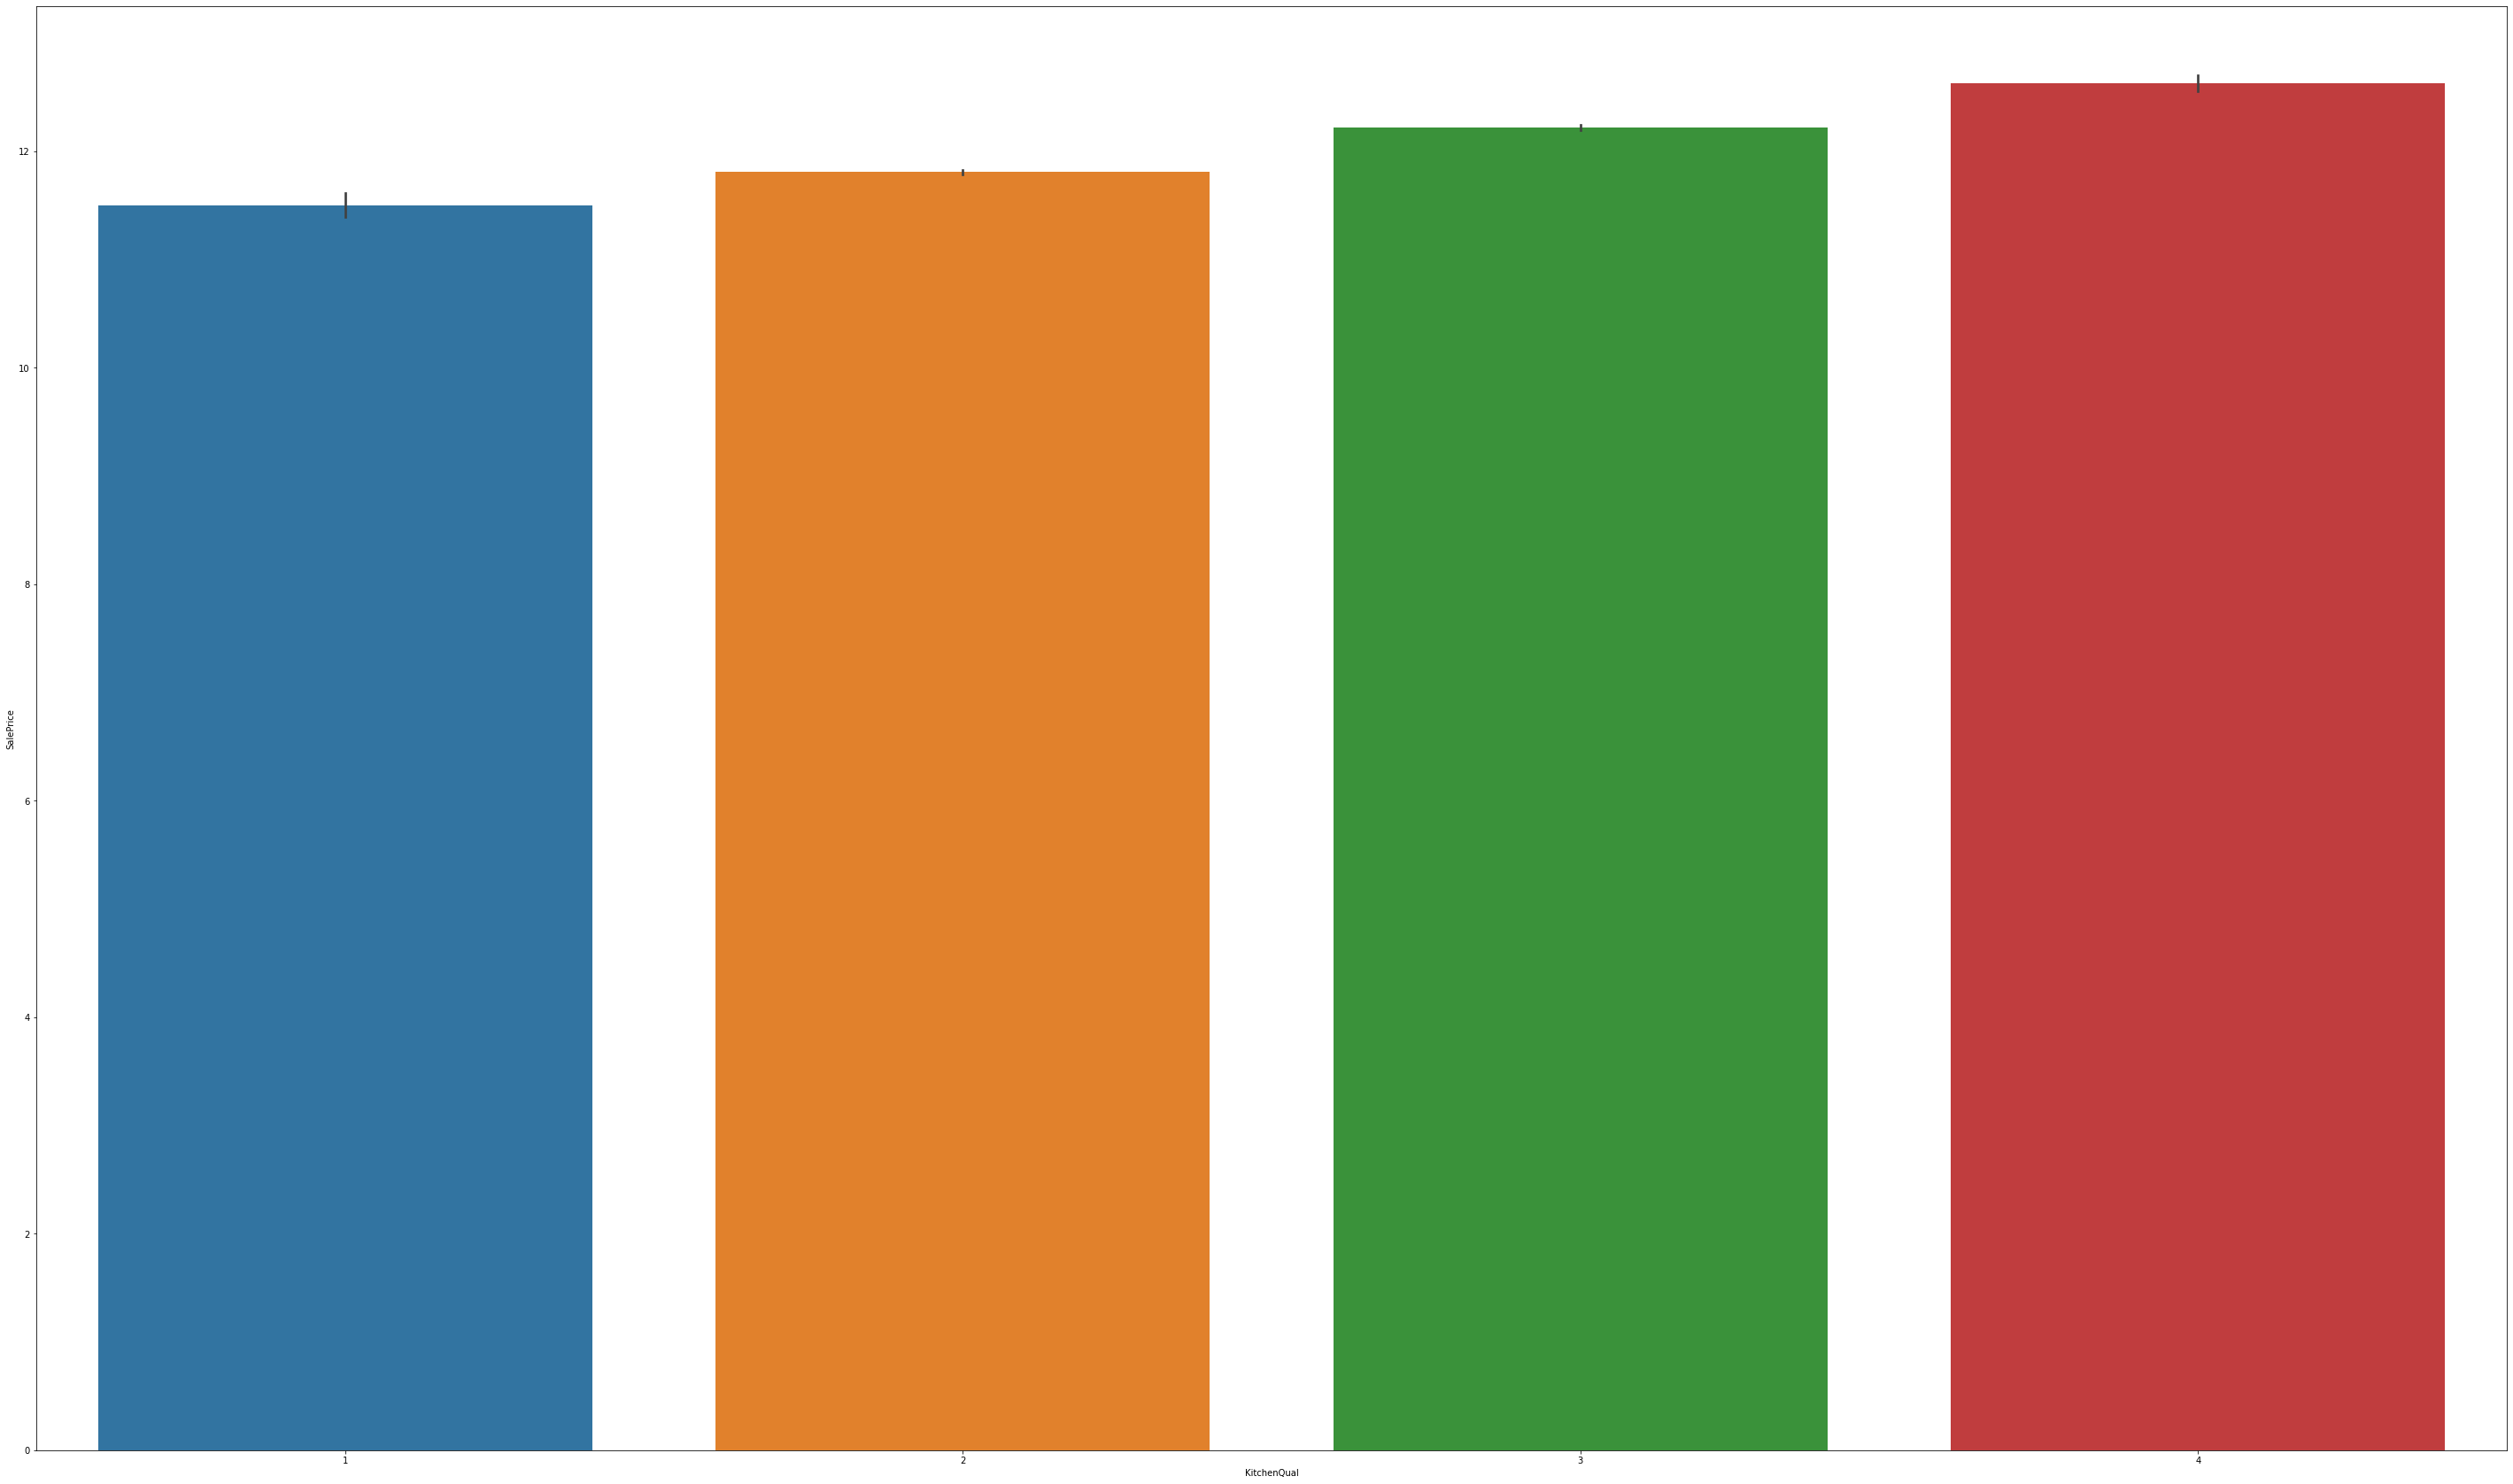

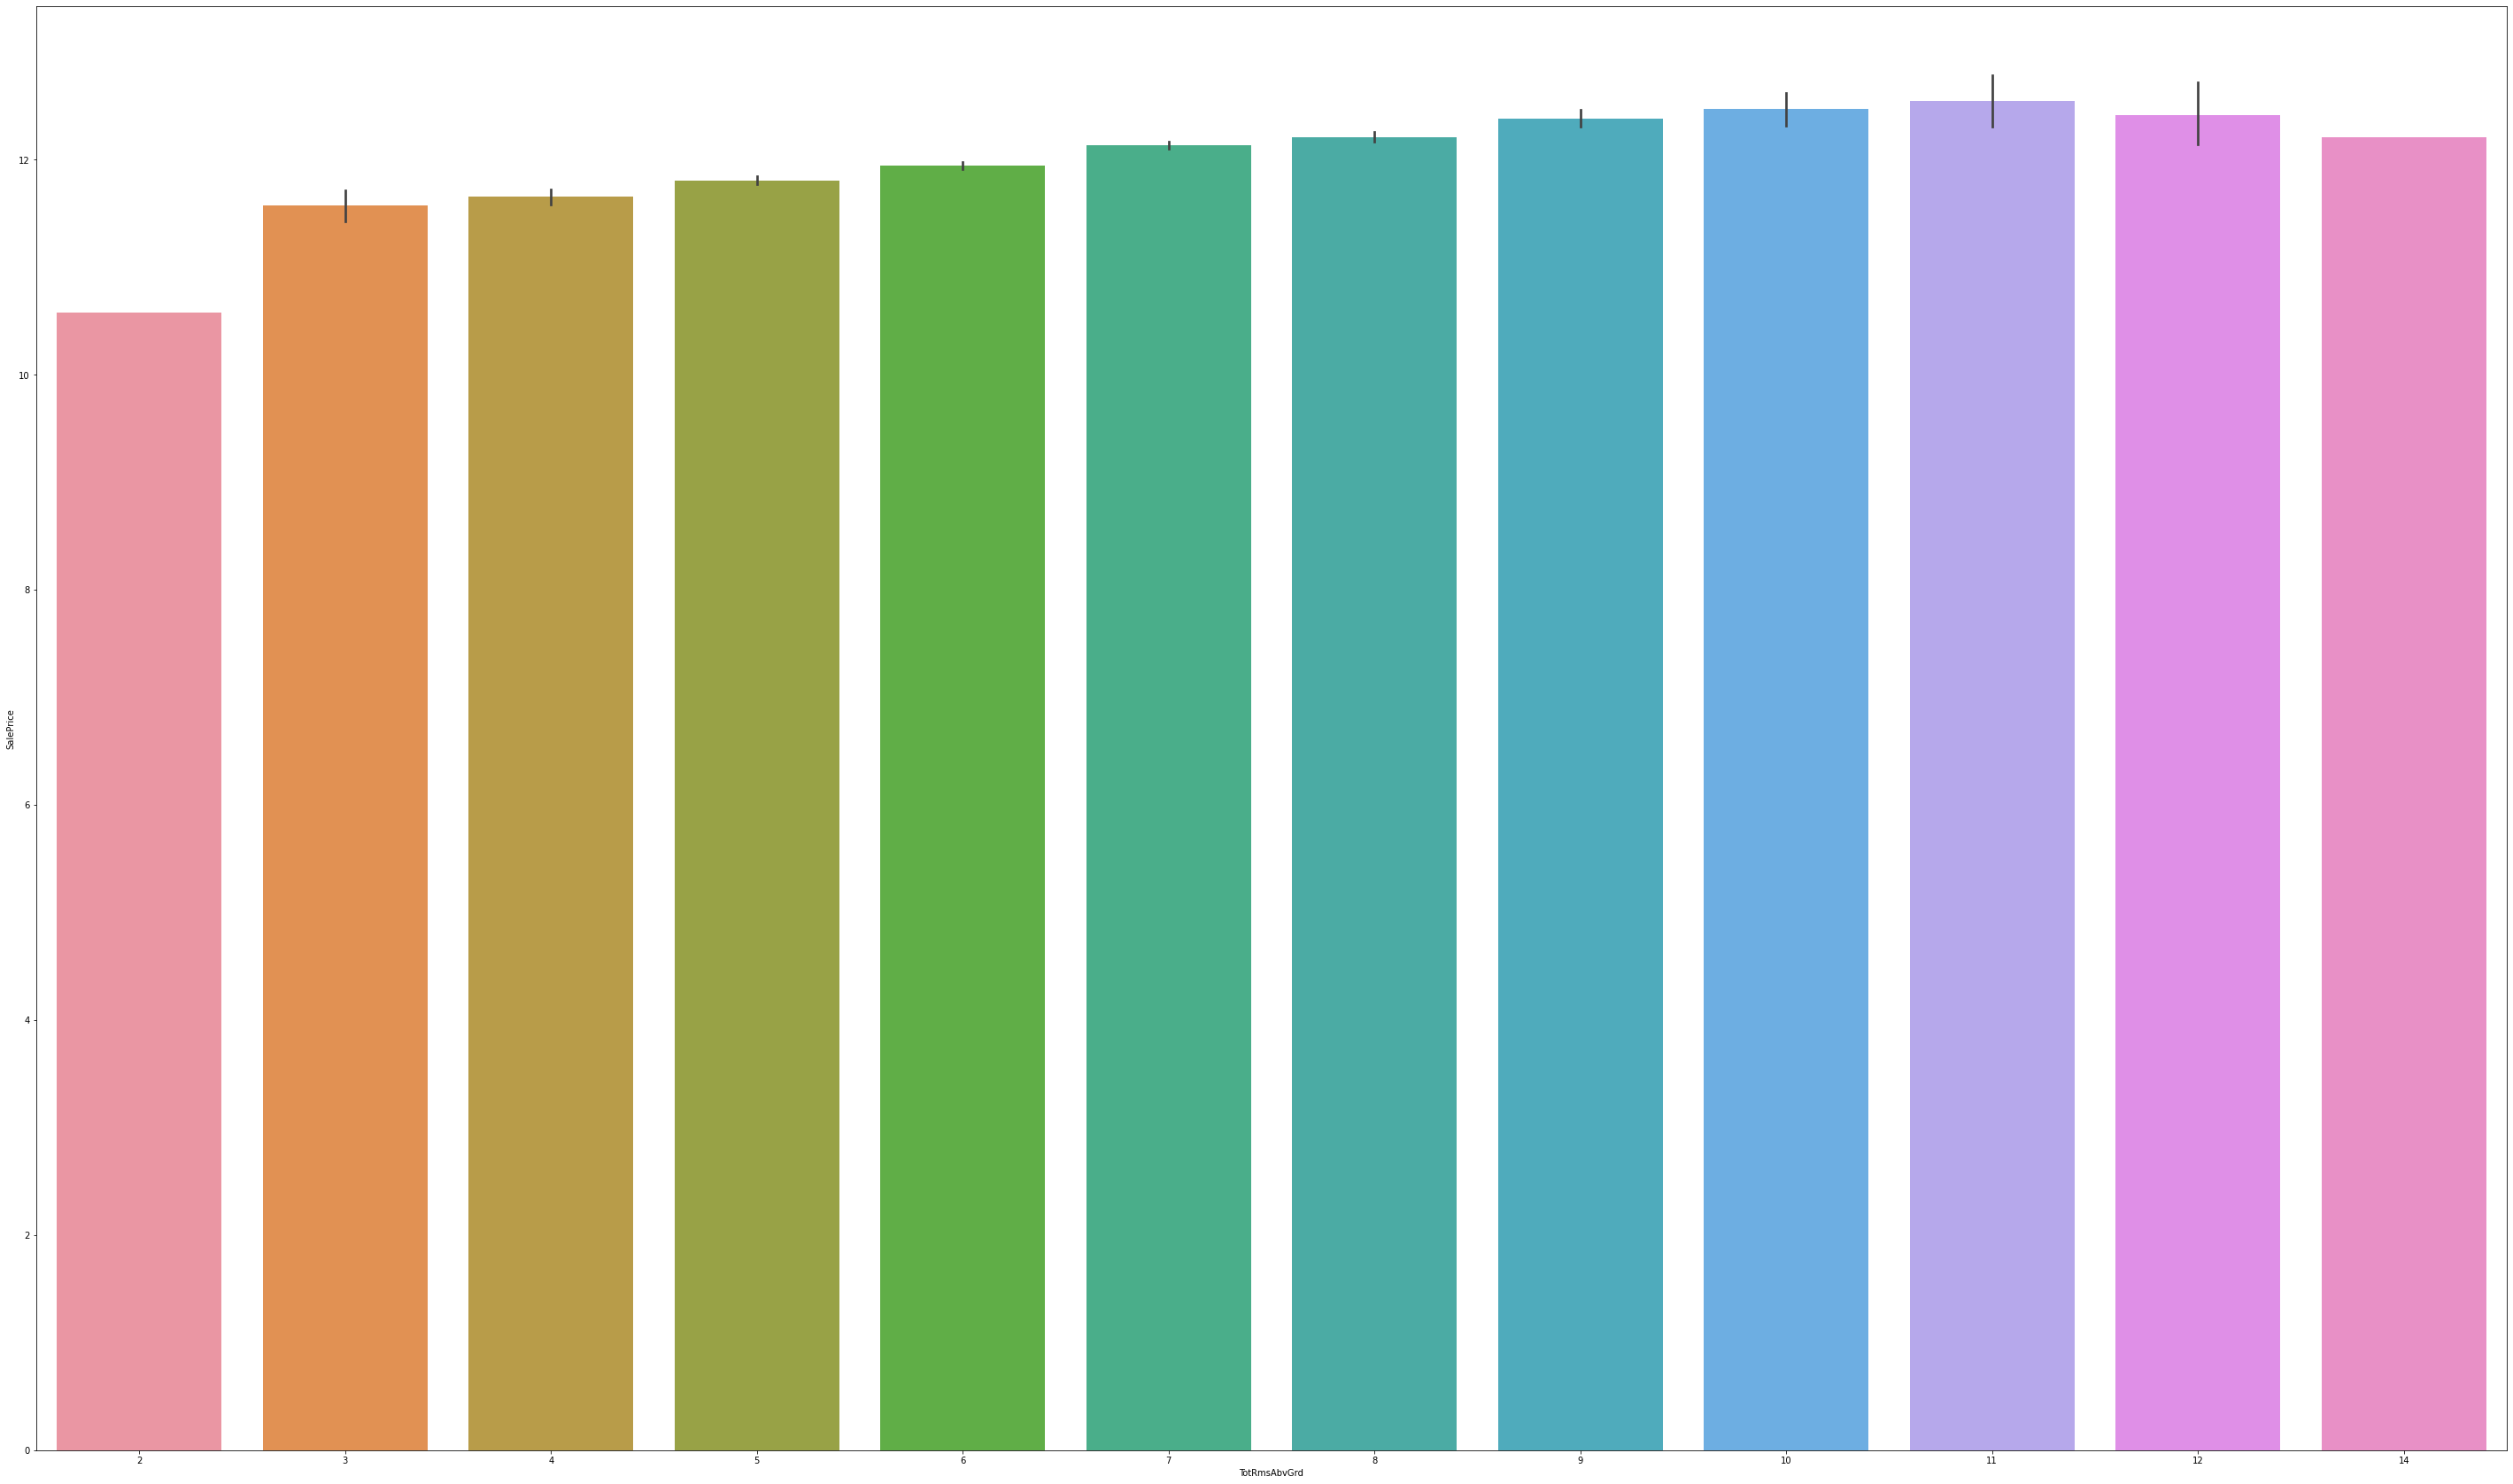

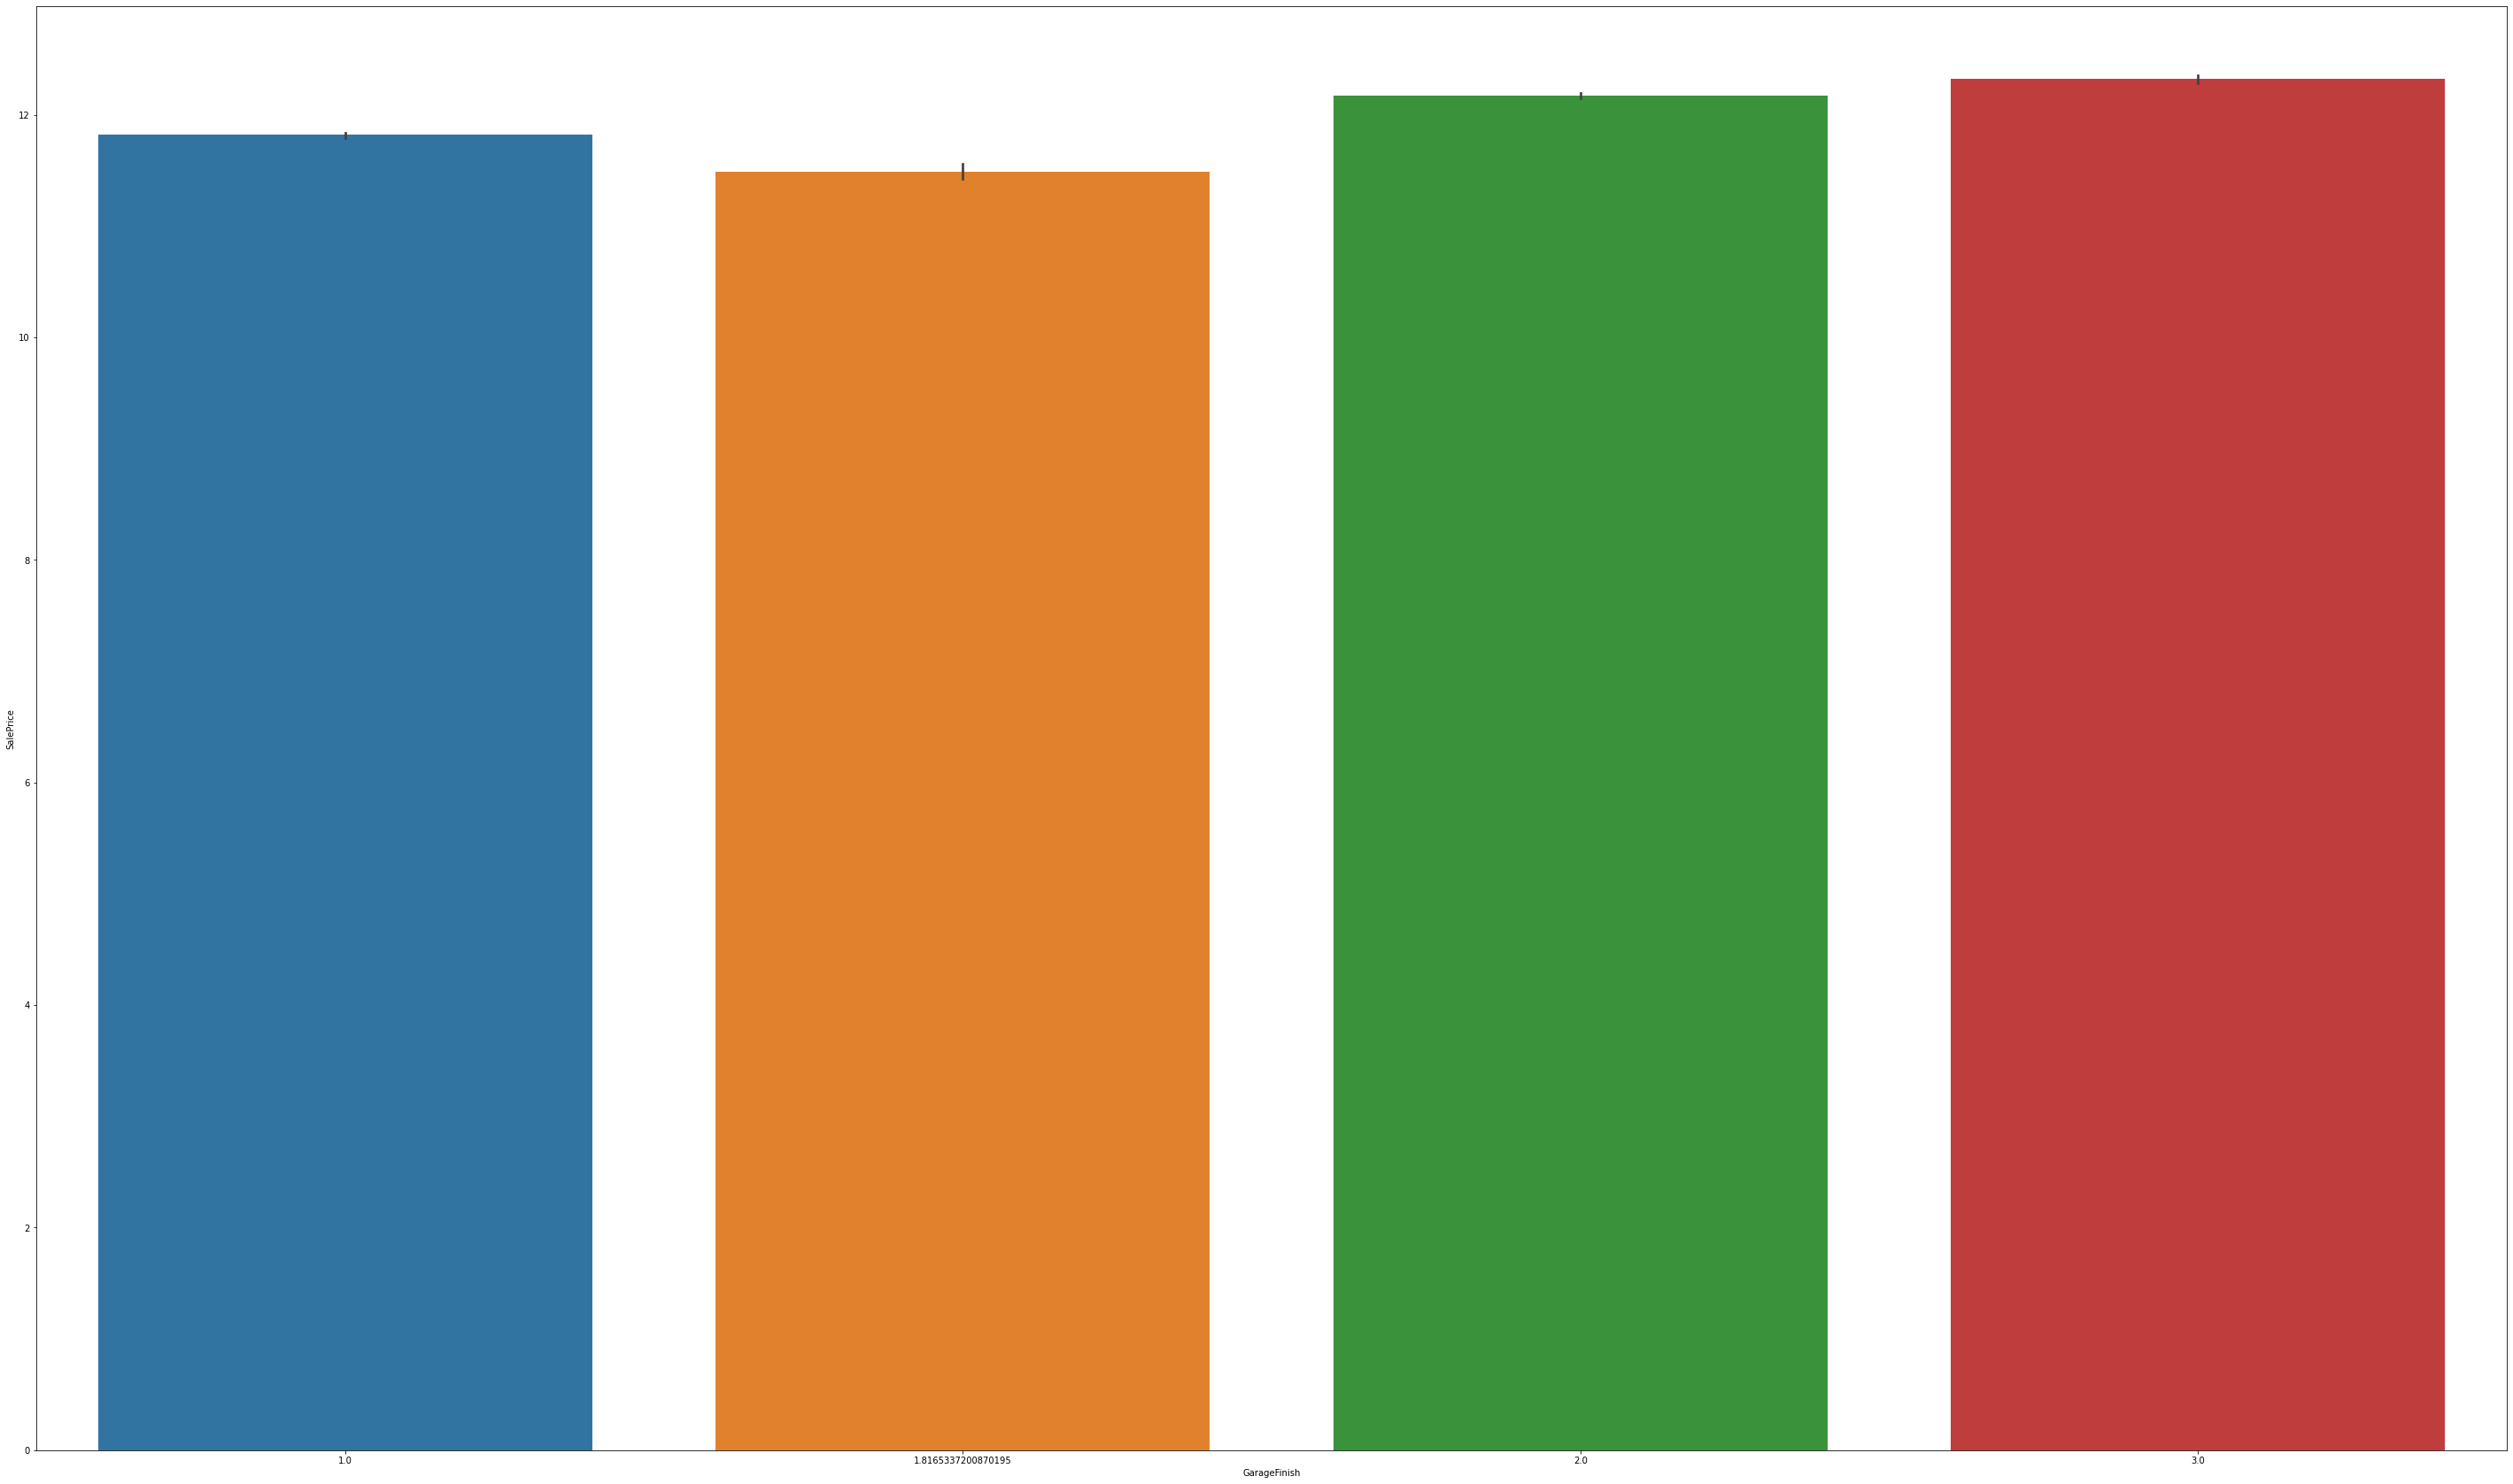

In [ ]:
for i in range(len(high_corr_features)):
  if i <= 9:
    plotbar(high_corr_features[i])

## Step 5- Data preprocessing

Checking the shape before creating dummies 

In [ ]:
train.shape

(1460, 71)

### 5.1 - Creating dummy variables 

In [ ]:
train_obj_col_dummy = pd.get_dummies(train[train_obj_col],drop_first=True)

train = pd.concat([train,train_obj_col_dummy],axis=1)

In [ ]:
train.drop(train_obj_col, axis = 1, inplace = True)

Checking the data after dummy variables 

In [ ]:
train.info()
train.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 184 entries, MSSubClass to PavedDrive_Y
dtypes: float64(11), int64(39), uint8(134)
memory usage: 812.8 KB


Index(['MSSubClass', 'LotArea', 'LotShape', 'LandSlope', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       ...
       'Functional_Mod', 'Functional_Sev', 'Functional_Typ',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageType_Detchd', 'PavedDrive_P',
       'PavedDrive_Y'],
      dtype='object', length=184)

In [ ]:
train.shape

(1460, 184)

After creating dummy variables we have 184 columnns

### Step 5.2 Creating Train Test Split dividing the data set in 70 30 
1. actual data set given = train
2. splitted train data set name : df_train
3. splitted test data set name : df_test

In [ ]:
np.random.seed(0)
df_train, df_test = train_test_split(train, train_size = 0.7, test_size = 0.3, random_state = 100)

Checking the shape of the train test splitted data

In [ ]:
df_train.shape

(1021, 184)

In [ ]:
df_test.shape

(438, 184)

### 5.3 : Scaling the numerical data , this also includes our target variable SalePrice . As it is in a different scale , we will scale it as well

In [ ]:
scaler = StandardScaler()
df_train[train_num_col] = scaler.fit_transform(df_train[train_num_col])
df_test[train_num_col] = scaler.transform(df_test[train_num_col])

Checking the data after scaling 

In [ ]:
df_train.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuiltold,YearRemodAddold,GarageYrBltold,YrSoldold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y
210,-0.657,-0.474,0.747,-0.228,-0.780,0.383,-0.561,-0.698,-0.261,-0.860,-0.049,-0.675,-0.343,0.044,-0.327,-0.293,-0.374,-0.431,-1.179,-3.577,-0.765,-0.788,-0.125,-1.228,1.067,-0.248,-1.026,-0.752,-1.043,-0.234,-0.776,-0.936,-0.925,0.003,-2.367,-2.218,0.010,0.012,-0.743,-0.709,1.150,-0.122,-0.275,-0.062,-0.084,-1.335,1.525,1.694,-1.541,-0.135,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
318,0.036,-0.057,0.747,3.306,0.650,-0.533,0.807,1.053,-0.261,0.621,-0.049,2.179,1.141,1.160,-0.327,-0.293,-0.455,0.622,0.873,0.280,0.512,2.141,-0.125,2.123,1.067,-0.248,0.786,1.247,1.396,-0.234,0.742,1.557,0.624,0.234,1.645,0.868,0.118,0.124,1.989,0.198,1.910,-0.122,-0.275,-0.062,-0.084,1.126,-0.717,-0.391,-0.458,-0.882,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,

In [ ]:
df_train.describe()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuiltold,YearRemodAddold,GarageYrBltold,YrSoldold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y
count,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.000,1021.00

### 5.4 : Popping the target variable from the datasets

In [ ]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [ ]:
y_test = df_test.pop('SalePrice')
X_test = df_test

## Step 6: Using Recursive Feature Elimination method to select top 50 features

We have total 184 features and to build a model with these many features will be tedious hence we will first use RFE ( Recursive Feature Elimination )

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We will choose 50 features from 184 for RFE so that later we will apply lasso 

In [ ]:
rfe = RFE(lm,50)
rfe = rfe.fit(X_train,y_train)

In [ ]:
rfe_rank = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_rank.columns = ['Column_Names','Status','Rank']

In [ ]:
rfe_rank

,Column_Names,Status,Rank
0,MSSubClass,False,26
1,LotArea,False,38
2,LotShape,False,98
3,LandSlope,False,54
4,OverallQual,True,1
5,OverallCond,True,1
6,MasVnrArea,False,89
7,ExterQual,False,119
8,ExterCond,False,94
9,BsmtQual,False,36


In [ ]:
rfe_used_columns = list(rfe_rank[rfe_rank.Status==True].Column_Names)

In [ ]:
rfe_used_columns

['OverallQual',
 'OverallCond',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'YearBuiltold',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Neighborhood_Blueste',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_Crawfor',
 'Neighborhood_MeadowV',
 'Neighborhood_NridgHt',
 'Neighborhood_SWISU',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Condition1_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'BldgType_Twnhs',
 'HouseStyle_2.5Fin',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior2nd_AsphShn',
 'Foundation_Wood',
 'Heating_Grav',
 'Heating_OthW',
 'Functional_Maj2',
 'Functional_Mod',
 'Functional_Sev',
 'GarageType_CarPort']

We are down to 50 features from 184 , we will first build lasso model using the columns we got from RFE

Filter the train data based on the top 50 RFE columns features

In [ ]:
X_train = X_train[rfe_used_columns]
X_test = X_test[rfe_used_columns]

## Step 7 : Build a model using Lasso Regression 

### We have assumed that the alpha value is 0.01 here

In [ ]:
lm = Lasso(alpha=0.01)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8409060182099368
0.863387065744593


From the lasso Model , We have got below R2 score
1. Train data : 0.84 or 84%
2. Test Data : 0.86 or 86 %

### Finding the coefficient of the predictors

In [ ]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', -0.194),
 ('LotArea', 0.355),
 ('LotShape', 0.133),
 ('LandSlope', 0.051),
 ('OverallQual', 0.02),
 ('OverallCond', 0.054),
 ('MasVnrArea', 0.033),
 ('ExterQual', 0.0),
 ('ExterCond', 0.303),
 ('BsmtQual', 0.132),
 ('BsmtCond', -0.244),
 ('BsmtExposure', 0.0),
 ('BsmtFinType1', 0.0),
 ('BsmtFinSF1', 0.139),
 ('BsmtFinType2', -0.052),
 ('BsmtFinSF2', -0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('HeatingQC', 0.07),
 ('CentralAir', -0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.108),
 ('BsmtHalfBath', 0.0),
 ('FullBath', -0.0),
 ('HalfBath', -0.0),
 ('BedroomAbvGr', -0.063),
 ('KitchenAbvGr', 0.0),
 ('KitchenQual', -0.0),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', -0.0),
 ('GarageFinish', 0.0),
 ('GarageCars', 0.0),
 ('GarageArea', 0.0),
 ('GarageQual', -0.0),
 ('GarageCond', 0.0),
 ('WoodDeckSF', -0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', -0.0),
 ('ScreenPorch', 0.0),
 ('Pool

## Step 8 - Using GridsearchCV to find the optimal value of alpha to hyper tune the parameters

In [ ]:
folds = KFold(n_splits=10,shuffle=True,random_state=100)
hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()
model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

In [ ]:
model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.9s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [ ]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)

In [ ]:
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')

In [ ]:
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.020,0.006,0.002,0.001,0.001,{'alpha': 0.001},0.884,0.423,0.894,0.755,0.914,0.909,0.866,0.901,0.912,0.862,0.832,0.143,1,0.880,0.917,0.881,0.881,0.878,0.878,0.883,0.881,0.879,0.885,0.884,0.011
1,0.005,0.000,0.002,0.000,0.010,{'alpha': 0.01},0.865,0.439,0.867,0.714,0.896,0.881,0.852,0.891,0.895,0.856,0.816,0.135,2,0.837,0.876,0.839,0.850,0.835,0.835,0.839,0.835,0.836,0.840,0.842,0.012
2,0.009,0.004,0.002,0.001,0.100,{'alpha': 0.1},0.795,0.540,0.816,0.687,0.841,0.813,0.754,0.835,0.813,0.805,0.770,0.088,3,0.780,0.824,0.782,0.799,0.775,0.781,0.787,0.780,0.781,0.782,0.787,0.014
3,0.005,0.003,0.002,0.000,1.000,{'alpha': 1.0},-0.015,-0.033,-0.003,-0.003,-0.055,-0.003,-0.005,-0.001,-0.000,-0.002,-0.012,0.017,4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.004,0.000,0.002,0.000,5.000,{'alpha': 5.0},-0.015,-0.033,-0.003,-0.003,-0.055,-0.003,-0.005,-0.001,-0.000,-0.002,-0.012,0.017,4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
cv_result_r.shape

(7, 31)

Plotting R2 vs alpha graphs 

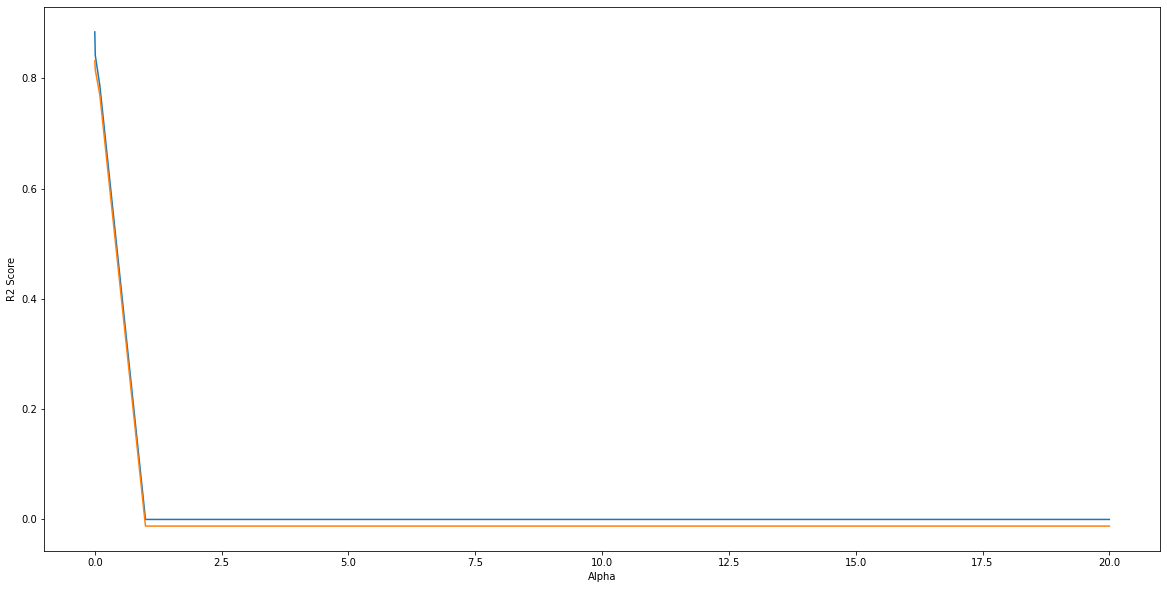

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.show()

Checking the optimum alpha value obtained 

In [ ]:
model_cv.best_params_

{'alpha': 0.001}

##Step 9 - Build lasso model using the alpha 0.001 

In [ ]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

Checking the r2 for the models 

In [ ]:
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8811346521441402
0.8624120569137589


### The R2 score for train is 88% and for test is 86%

### Checking the coefficient value and sorting the predictors to find top 5

In [ ]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Variable','Coef']

In [ ]:
lasso_coef.sort_values(by='Coef',ascending=False).head(15)

,Variable,Coef
39,OpenPorchSF,0.684
33,GarageFinish,0.459
17,TotalBsmtSF,0.428
18,HeatingQC,0.379
13,BsmtFinSF1,0.351
22,LowQualFinSF,0.313
1,LotArea,0.302
20,1stFlrSF,0.276
42,ScreenPorch,0.252
8,ExterCond,0.208


## Step 10 : Building a model using Ridge regression

In [ ]:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.927275381123028
0.8536384685714711


We will need to tune the alpha as this is a overfitted model.
The train r2 score is 92% and test is 85%

## Step 11 - Using GridsearchCV to find the optimal value of alpha to hyper tune the model

In [ ]:
folds = KFold(n_splits=10,shuffle=True,random_state=100)
hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Ridge()
model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

In [ ]:
model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.8s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [ ]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)

In [ ]:
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')

In [ ]:
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.006,0.002,0.002,0.001,0.001,{'alpha': 0.001},0.895,0.399,0.910,0.696,0.401,0.907,0.448,0.310,0.933,0.854,0.675,0.243,7,0.930,0.927,0.928,0.928,0.925,0.929,0.928,0.927,0.926,0.931,0.928,0.002
1,0.008,0.003,0.002,0.001,0.010,{'alpha': 0.01},0.896,0.400,0.909,0.701,0.479,0.908,0.507,0.391,0.933,0.854,0.698,0.218,6,0.929,0.927,0.928,0.927,0.925,0.928,0.928,0.927,0.926,0.931,0.928,0.002
2,0.004,0.000,0.002,0.000,0.100,{'alpha': 0.1},0.897,0.409,0.904,0.728,0.781,0.910,0.748,0.724,0.931,0.850,0.788,0.148,5,0.918,0.926,0.918,0.917,0.915,0.917,0.919,0.918,0.915,0.921,0.918,0.003
3,0.005,0.002,0.002,0.000,1.000,{'alpha': 1.0},0.895,0.445,0.896,0.753,0.913,0.909,0.869,0.898,0.918,0.854,0.835,0.138,3,0.888,0.919,0.889,0.891,0.886,0.886,0.889,0.887,0.886,0.892,0.891,0.009
4,0.006,0.003,0.002,0.001,5.000,{'alpha': 5.0},0.887,0.464,0.892,0.756,0.914,0.905,0.871,0.907,0.917,0.864,0.838,0.132,1,0.870,0.906,0.872,0.879,0.868,0.869,0.872,0.869,0.869,0.874,0.875,0.011


In [ ]:
cv_result_r.shape

(7, 31)

Lets try to plot 

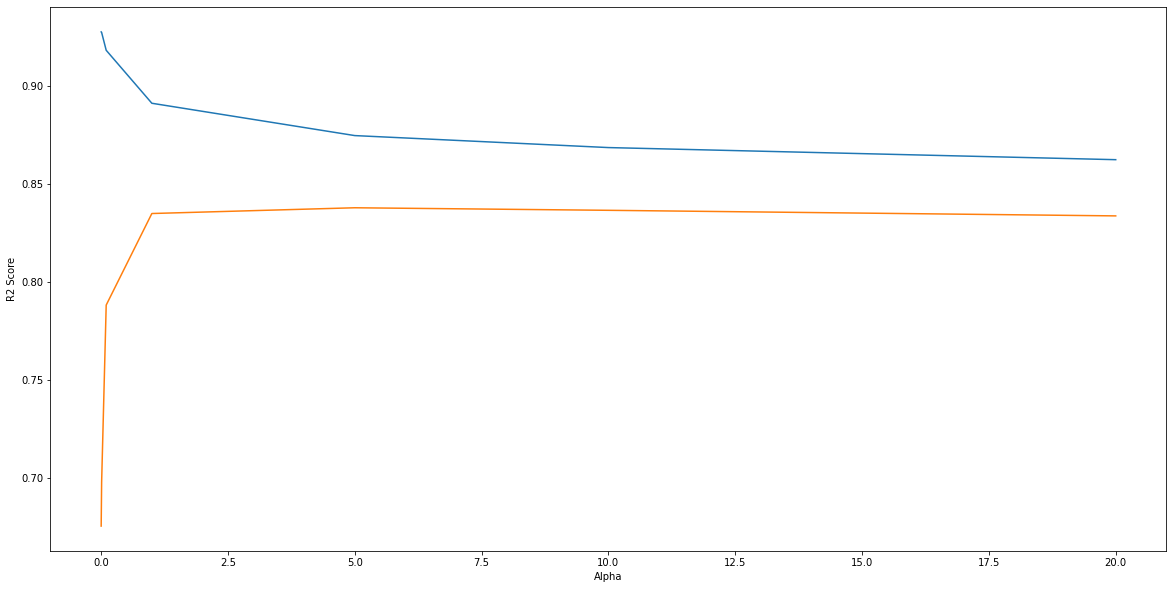

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.show()

### Checking the best value for alpha

In [ ]:
model_cv.best_params_

{'alpha': 5.0}

### Building a ridge model using aplha 5 

In [ ]:
ridge = Ridge(alpha = 5)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.873815767125487
0.8756534370725275


In [ ]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Predictors','Coef']

### Sorting to get top 5 coefficients 

In [ ]:
ridge_coef.sort_values(by='Coef',ascending=False)

,Predictors,Coef
39,OpenPorchSF,0.369
18,HeatingQC,0.364
17,TotalBsmtSF,0.363
13,BsmtFinSF1,0.354
33,GarageFinish,0.313
1,LotArea,0.301
20,1stFlrSF,0.275
22,LowQualFinSF,0.274
42,ScreenPorch,0.253
8,ExterCond,0.183


## Step 12 : Final Inference

####Here are our final inferences from all the plots and data analysis 
#### major factors that are impacting a house sale price are as below

  1. Open Porch SF  
  2. HeatingQC
  3. TotalBsmtSF
  4. BsmtFinSF1
  5. Garage Finish 
  6. lotArea
  7. 1StFlrSF
  8. lowQaulFinSF
  9. ScreenPorch 
  10. external conditions 

With Rigde we are getting accuracy of almost same of the train and test data therefore there is no ovefitting with aplha 5

with lasso we are getting the accuracy of 88 on train and 86 on test data with alpha 0.001 and there fore we find these results optimal 


